In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
from datetime import datetime

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.seasonal as smt

# For checking autocorrelation
from pandas.plotting import lag_plot

import os

import missingno as msno

# For checking stationary
from statsmodels.tsa.seasonal import seasonal_decompose

from IPython.display import HTML, display

from statsmodels.tsa.arima_model import ARIMA

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

# Data collection & Understanding

In [ ]:

# pathlists = ['/content/Data', '/content/Data/ETFs', '/content/Data/Stocks','/content/ETFs','/content/Stocks']

filepath = '/content/drive/MyDrive/LJMU/Shasank/Dataset/data'


pathlists = [f'{filepath}/Data', f'{filepath}/Data/ETFs', f'{filepath}/Data/Stocks',f'{filepath}/ETFs',f'{filepath}/Stocks']
# path = "/content/Data"  # replace with the path of the folder you want to analyze

for path in pathlists:
  file_count = 0
  for root, dirs, files in os.walk(path):
      file_count += len(files)

  print(f"Number of files in folder {path}: {file_count}")

Number of files in folder /content/drive/MyDrive/LJMU/Shasank/Dataset/data/Data: 8539
Number of files in folder /content/drive/MyDrive/LJMU/Shasank/Dataset/data/Data/ETFs: 1344
Number of files in folder /content/drive/MyDrive/LJMU/Shasank/Dataset/data/Data/Stocks: 7195
Number of files in folder /content/drive/MyDrive/LJMU/Shasank/Dataset/data/ETFs: 1344
Number of files in folder /content/drive/MyDrive/LJMU/Shasank/Dataset/data/Stocks: 7195


So, for this study - I am concentrating the stocks folder

In [ ]:
#filenames = [x for x in os.listdir("./Stocks/") if x.endswith('.txt') and os.path.getsize(x) > 0]
# To exclude files containing certain names, you can use a conditional statement in the list comprehension that checks 
# if the name is not in the file name before adding it to the list. 

# filenames = random.sample([x for x in allFiles if x.endswith('.txt')], 10)
# filtered_files = [x for x in allFiles if x.endswith('.txt') and all(name not in x.lower() for name in selectedCompanies)]

"""
# Selected 10 Companies: 
Apple (aapl), 
Amazon (amzn),
Bank of America (bac),
Google (googl),
JPM - JPMorgan Chase & Co (jpm),
Microsoft (msft), 
Tesla (tsla), 
Twitter (twtr), 
UnitedHealth Group Inc (unh),
Walmart Inc (wmt)
"""

consumer_staples = ['tgt', 'dltr', 'pg', 'wmt', 'cost', 'ko']
finance = ['jpm', 'usb', 'bac', 'gs', 'wfc']
healthcare = ['jnj', 'unh', 'pfe']
ecommerce = ['amzn']
software = ['aapl', 'googl', 'msft']
manufacturing = ['tsla']
social_media = ['twtr']

selectedCompanies = [val for sublist in [consumer_staples, finance, healthcare, ecommerce, software, manufacturing, social_media] for val in sublist]

num_files = 10

# Define the directory path
directory_path = f'{filepath}/Stocks/'

# Create an empty list to store the dataframes
selectedCompanies_list = [f'{filepath}/Stocks/' + file_name + ".us.txt" for file_name in selectedCompanies]

# # Loop through the list of filenames
# for file_name in selectedCompanies:
#     # Read the csv file using pd.read_csv() method
#     file_path = f'{filepath}/Stocks/' + file_name + ".us.txt"
#     selectedCompanies_list.append(file_path)

In [ ]:
dataStocks_df = []
for filename in selectedCompanies_list:
    df = pd.read_csv(os.path.join(f'/content/drive/MyDrive/LJMU/Shasank/Dataset/data/Data/Stocks',filename), sep=',')
    label, _, _ = filename.split(sep='.')
    df['Label'] = label
    df['Date'] = pd.to_datetime(df['Date'])

    dataStocks_df.append(df)

In [ ]:
stocks_df = []
for filename in selectedCompanies_list:
    df = pd.read_csv(os.path.join(f'{filepath}/Stocks',filename), sep=',')
    label, _, _ = filename.split(sep='.')
    df['Label'] = label
    df['Date'] = pd.to_datetime(df['Date'])

    stocks_df.append(df)

In [ ]:
for index, filename in enumerate(selectedCompanies):
  print(filename, '\t', stocks_df[index].shape,'\t',dataStocks_df[index].shape)

tgt 	 (8726, 8) 	 (8726, 8)
dltr 	 (5709, 8) 	 (5709, 8)
pg 	 (12075, 8) 	 (12075, 8)
wmt 	 (11443, 8) 	 (11443, 8)
cost 	 (7903, 8) 	 (7903, 8)
ko 	 (12075, 8) 	 (12075, 8)
jpm 	 (12074, 8) 	 (12074, 8)
usb 	 (7561, 8) 	 (7561, 8)
bac 	 (7929, 8) 	 (7929, 8)
gs 	 (4661, 8) 	 (4661, 8)
wfc 	 (8323, 8) 	 (8323, 8)
jnj 	 (12074, 8) 	 (12074, 8)
unh 	 (6964, 8) 	 (6964, 8)
pfe 	 (9042, 8) 	 (9042, 8)
amzn 	 (5153, 8) 	 (5153, 8)
aapl 	 (8364, 8) 	 (8364, 8)
googl 	 (3333, 8) 	 (3333, 8)
msft 	 (7983, 8) 	 (7983, 8)
tsla 	 (1858, 8) 	 (1858, 8)
twtr 	 (1011, 8) 	 (1011, 8)


In [ ]:
print(selectedCompanies[0])
display(stocks_df[0].info())

tgt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8726 entries, 0 to 8725
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     8726 non-null   datetime64[ns]
 1   Open     8726 non-null   float64       
 2   High     8726 non-null   float64       
 3   Low      8726 non-null   float64       
 4   Close    8726 non-null   float64       
 5   Volume   8726 non-null   int64         
 6   OpenInt  8726 non-null   int64         
 7   Label    8726 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 545.5+ KB


None

In [ ]:
dataStocks_df[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8726 entries, 0 to 8725
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     8726 non-null   datetime64[ns]
 1   Open     8726 non-null   float64       
 2   High     8726 non-null   float64       
 3   Low      8726 non-null   float64       
 4   Close    8726 non-null   float64       
 5   Volume   8726 non-null   int64         
 6   OpenInt  8726 non-null   int64         
 7   Label    8726 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 545.5+ KB


In [ ]:
display(stocks_df[0].head())

,Date,Open,High,Low,Close,Volume,OpenInt,Label
0,1983-04-06,1.6351,1.6434,1.6269,1.6434,2170898,0,/content/drive/MyDrive/LJMU/Shasank/Dataset/da...
1,1983-04-07,1.6598,1.7093,1.6598,1.7016,3699535,0,/content/drive/MyDrive/LJMU/Shasank/Dataset/da...
2,1983-04-08,1.7016,1.7093,1.7016,1.7016,2816067,0,/content/drive/MyDrive/LJMU/Shasank/Dataset/da...
3,1983-04-11,1.7016,1.7260,1.6928,1.7176,1299052,0,/content/drive/MyDrive/LJMU/Shasank/Dataset/da...
4,1983-04-12,1.7176,1.7424,1.7176,1.7424,2365608,0,/content/drive/MyDrive/LJMU/Shasank/Dataset/da...


In [ ]:
display(dataStocks_df[0].head())

,Date,Open,High,Low,Close,Volume,OpenInt,Label
0,1983-04-06,1.6351,1.6434,1.6269,1.6434,2170898,0,/content/drive/MyDrive/LJMU/Shasank/Dataset/da...
1,1983-04-07,1.6598,1.7093,1.6598,1.7016,3699535,0,/content/drive/MyDrive/LJMU/Shasank/Dataset/da...
2,1983-04-08,1.7016,1.7093,1.7016,1.7016,2816067,0,/content/drive/MyDrive/LJMU/Shasank/Dataset/da...
3,1983-04-11,1.7016,1.7260,1.6928,1.7176,1299052,0,/content/drive/MyDrive/LJMU/Shasank/Dataset/da...
4,1983-04-12,1.7176,1.7424,1.7176,1.7424,2365608,0,/content/drive/MyDrive/LJMU/Shasank/Dataset/da...


Since all data are identical in Stocks folder from both paths, I am excluding the DATA and EFT's for this analysis

## Considering only Stocks folder

In [ ]:
# Define the date parser function
date_parser = lambda x: datetime.strptime(x, '%Y-%m-%d')

In [ ]:
# Create an empty list to store the dataframes
data_list = []

# Loop through the list of filenames
for file_name in selectedCompanies:
    # Read the csv file using pd.read_csv() method
    file_path = f'{filepath}/Stocks/' + file_name + ".us.txt"
    data = pd.read_csv(file_path, parse_dates=['Date'], date_parser=date_parser)
    data['Label'] = file_name
    
    # Append the dataframe to the list
    data_list.append(data)

"""
the ignore_index=True parameter is used to reset the index of the concatenated DataFrame. 
This means that the original index values of each DataFrame are ignored and a new index is 
created that is continuous from 0 to the total number of rows in the concatenated DataFrame. 
This can be useful when you want to concatenate multiple DataFrames with overlapping indices, 
or when you simply want to reset the index to start from 0.

In the second statement, the original index of each DataFrame is retained in the concatenated DataFrame. 
This can be useful when you want to preserve the original index values, 
for example, if the index contains meaningful information such as dates or unique identifiers.

if you want to reset the index of the concatenated DataFrame, you should use ignore_index=True. 
If you want to preserve the original index values, you should omit this parameter.
"""

# Concatenate the dataframes together using pd.concat() method
data_df = pd.concat(data_list, ignore_index=True)
data_df.shape

(154261, 8)

In [ ]:
display(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154261 entries, 0 to 154260
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Date     154261 non-null  datetime64[ns]
 1   Open     154261 non-null  float64       
 2   High     154261 non-null  float64       
 3   Low      154261 non-null  float64       
 4   Close    154261 non-null  float64       
 5   Volume   154261 non-null  int64         
 6   OpenInt  154261 non-null  int64         
 7   Label    154261 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 9.4+ MB


None

In [ ]:
display(data_df.head())

,Date,Open,High,Low,Close,Volume,OpenInt,Label
0,1983-04-06,1.6351,1.6434,1.6269,1.6434,2170898,0,tgt
1,1983-04-07,1.6598,1.7093,1.6598,1.7016,3699535,0,tgt
2,1983-04-08,1.7016,1.7093,1.7016,1.7016,2816067,0,tgt
3,1983-04-11,1.7016,1.7260,1.6928,1.7176,1299052,0,tgt
4,1983-04-12,1.7176,1.7424,1.7176,1.7424,2365608,0,tgt


In [ ]:
display(data_df.sample(5))

,Date,Open,High,Low,Close,Volume,OpenInt,Label
29239,1983-04-21,0.7651,0.7651,0.7223,0.7394,10126675,0,wmt
16892,1979-09-25,1.9201,1.9201,1.9040,1.9201,2522680,0,pg
121797,1998-12-07,28.3790,28.6320,28.3170,28.4740,8843951,0,pfe
93213,1996-12-05,8.3478,8.3726,8.2810,8.3478,2772600,0,wfc
50667,1989-01-17,2.2678,2.2758,2.2557,2.2678,6717866,0,ko


# EDA

## Checking the shape and missing value for OpenInt - to decide that we can drop it

In [ ]:
data_df.OpenInt.value_counts()

0    154261
Name: OpenInt, dtype: int64

In [ ]:
data_df.drop("OpenInt",axis=1,inplace=True)
data_df.shape

(154261, 7)

In [ ]:
display(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154261 entries, 0 to 154260
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    154261 non-null  datetime64[ns]
 1   Open    154261 non-null  float64       
 2   High    154261 non-null  float64       
 3   Low     154261 non-null  float64       
 4   Close   154261 non-null  float64       
 5   Volume  154261 non-null  int64         
 6   Label   154261 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 8.2+ MB


None

In [ ]:
# Extract the "Date" column from the DataFrame
dates = data_df['Date']

# Find the minimum and maximum dates in the "Date" column
min_date = dates.min().strftime('%Y-%m-%d')
max_date = dates.max().strftime('%Y-%m-%d')

print('Minimum date:', min_date)
print('Maximum date:', max_date)

Minimum date: 1970-01-02
Maximum date: 2017-11-10


In [ ]:
display(data_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Open,154261.0,4.102117e+01,8.887763e+01,0.00821,3.605200e+00,18.972,4.228000e+01,1.126100e+03
High,154261.0,4.145348e+01,8.961372e+01,0.00821,3.653400e+00,19.231,4.276300e+01,1.135540e+03
Low,154261.0,4.057142e+01,8.804949e+01,0.00821,3.561100e+00,18.703,4.183700e+01,1.124060e+03
Close,154261.0,4.102505e+01,8.886192e+01,0.00821,3.605200e+00,18.974,4.230800e+01,1.132880e+03
Volume,154261.0,2.079785e+07,4.609613e+07,0.00000,3.124120e+06,7027200.000,1.579623e+07,2.423735e+09


## Checking Missing Values

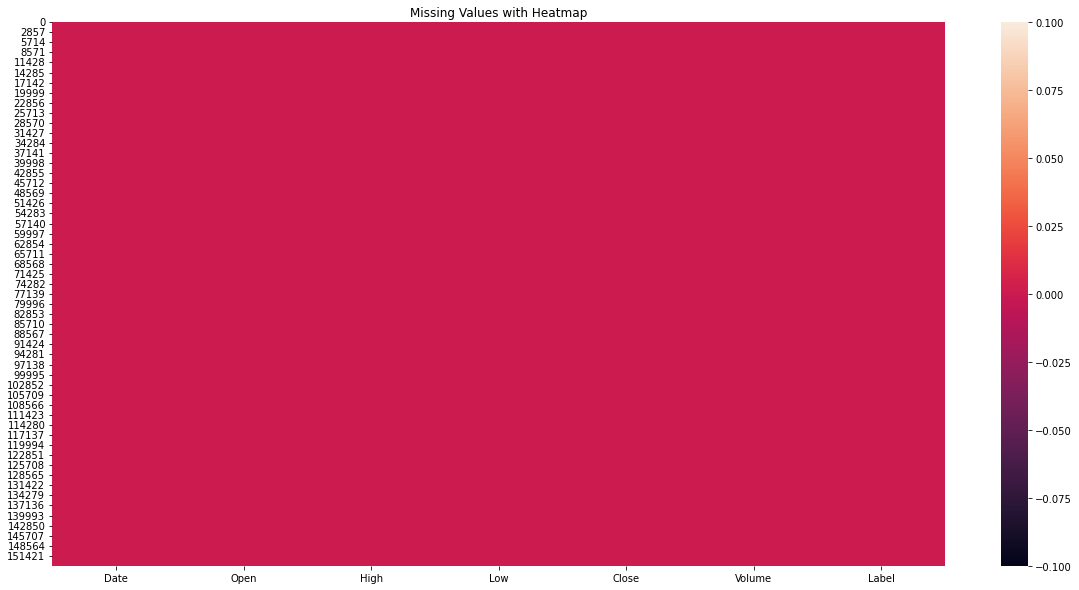

In [ ]:
# Set figure size
plt.figure(figsize=(20,10))

# Create heatmap
sns.heatmap(data_df.isnull())

# set plot title
plt.title("Missing Values with Heatmap")

# display the plot
plt.show()

## Using missingno library for analysing missing values

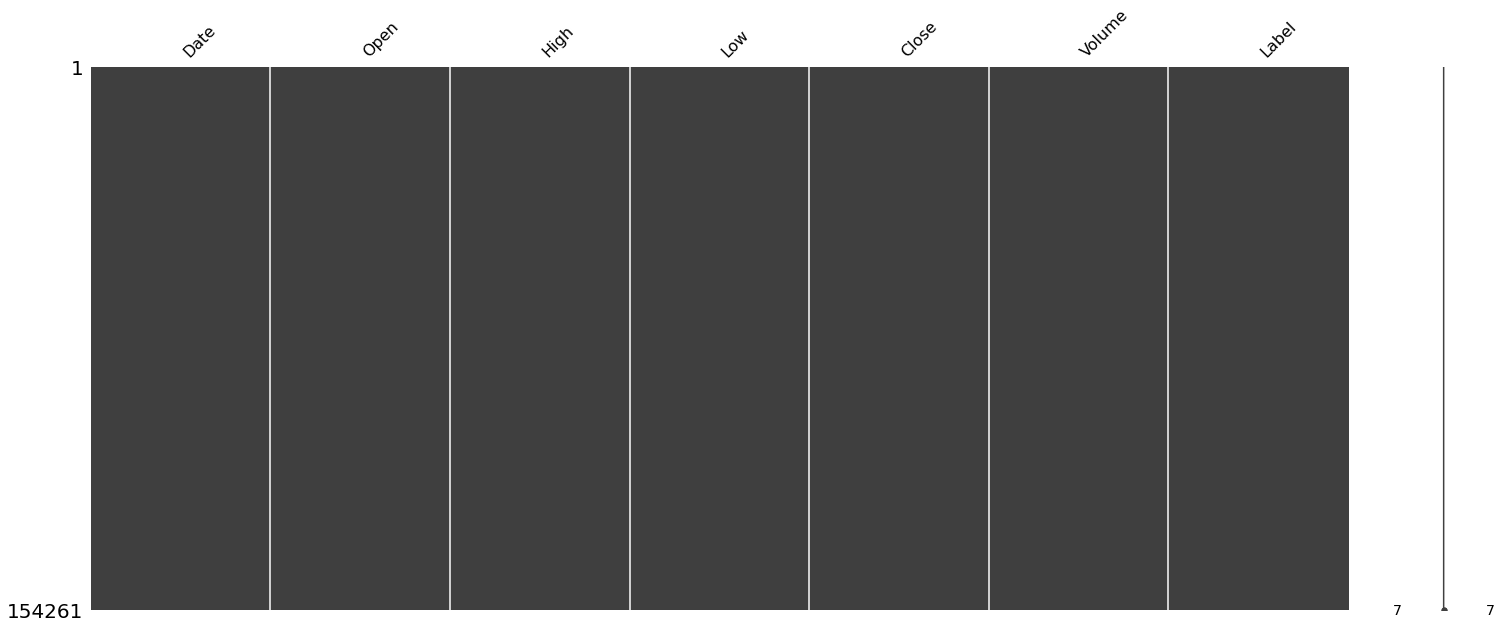

In [ ]:
# create a matrix plot of missing values
msno.matrix(data_df)

# display the plot
plt.show()

In [ ]:
# Calculate the percentage of missing values for each feature
missing_values_percentage = (data_df.isnull().sum() / len(data_df)) * 100
print(missing_values_percentage,'\n')

# Check if the percentage of missing values for all columns is 0
if (missing_values_percentage == 0).all():
    print("There are no missing values in the dataset.")
else:
    # Create a dataframe with the features having missing values and the percentage of missing values
        
    # Create a dataframe with the feature names and missing value percentages
    missing_data = pd.DataFrame({'Feature': data_df.columns, 'MissingPercentage': missing_values_percentage})
        
    # Select only the features with missing values
    missing_data = missing_data.loc[missing_data['MissingPercentage'] > 0]

    # Sort the features by percentage of missing values (descending order)
    missing_data = missing_data.sort_values(by='MissingPercentage', ascending=False)

    # Display the dataframe
    display(missing_data)

Date      0.0
Open      0.0
High      0.0
Low       0.0
Close     0.0
Volume    0.0
Label     0.0
dtype: float64 

There are no missing values in the dataset.


## Pivot table to club data

In [ ]:
df_high = data_df.pivot_table(values=['High'],index = 'Date', columns=['Label'])
display(df_high.head().T)

Date        1970-01-02  1970-01-05  1970-01-06  1970-01-07  1970-01-08
     Label                                                            
High aapl          NaN         NaN         NaN         NaN         NaN
     amzn          NaN         NaN         NaN         NaN         NaN
     bac           NaN         NaN         NaN         NaN         NaN
     cost          NaN         NaN         NaN         NaN         NaN
     dltr          NaN         NaN         NaN         NaN         NaN
     googl         NaN         NaN         NaN         NaN         NaN
     gs            NaN         NaN         NaN         NaN         NaN
     jnj        0.6104      0.5941      0.5864      0.5941      0.5941
     jpm        3.1254      3.1339      3.1588      3.2503      3.2254
     ko         0.6975      0.6975      0.6975      0.7016      0.7056
     msft          NaN         NaN         NaN         NaN         NaN
     pfe           NaN         NaN         NaN         NaN         NaN
     pg         1.3796      1.3875      1.3796      1.4039      1.4198
     tgt           NaN         NaN         NaN         NaN         NaN
     tsla          NaN         NaN         NaN         NaN         NaN
     twtr          NaN         NaN         NaN         NaN         NaN
     unh           NaN         NaN         NaN         NaN         NaN
     usb           NaN         NaN         NaN         NaN         NaN
     wfc           NaN         NaN         NaN         NaN         NaN
     wmt           NaN         NaN         NaN         NaN         NaN

In [ ]:
df_Close = data_df.pivot_table(values=['Close'],index = 'Date', columns=['Label'])
display(df_Close.head())

Close                                                            \
Label       aapl amzn bac cost dltr googl  gs     jnj     jpm      ko msft   
Date                                                                         
1970-01-02   NaN  NaN NaN  NaN  NaN   NaN NaN  0.5941  3.1254  0.6975  NaN   
1970-01-05   NaN  NaN NaN  NaN  NaN   NaN NaN  0.5776  3.1254  0.6894  NaN   
1970-01-06   NaN  NaN NaN  NaN  NaN   NaN NaN  0.5864  3.1588  0.6934  NaN   
1970-01-07   NaN  NaN NaN  NaN  NaN   NaN NaN  0.5864  3.2337  0.6975  NaN   
1970-01-08   NaN  NaN NaN  NaN  NaN   NaN NaN  0.5941  3.2254  0.7016  NaN   

                                                      
Label      pfe      pg tgt tsla twtr unh usb wfc wmt  
Date                                                  
1970-01-02 NaN  1.3796 NaN  NaN  NaN NaN NaN NaN NaN  
1970-01-05 NaN  1.3875 NaN  NaN  NaN NaN NaN NaN NaN  
1970-01-06 NaN  1.3796 NaN  NaN  NaN NaN NaN NaN NaN  
1970-01-07 NaN  1.4039 NaN  NaN  NaN NaN NaN NaN NaN  
1970-01-08 NaN  1.4198 NaN  NaN  NaN NaN NaN NaN NaN

In [ ]:
# some stocks do NOT have so long history data, replace NaN with 0 
data_df.fillna(0, inplace=True)
display(data_df.head())

,Date,Open,High,Low,Close,Volume,Label
0,1983-04-06,1.6351,1.6434,1.6269,1.6434,2170898,tgt
1,1983-04-07,1.6598,1.7093,1.6598,1.7016,3699535,tgt
2,1983-04-08,1.7016,1.7093,1.7016,1.7016,2816067,tgt
3,1983-04-11,1.7016,1.7260,1.6928,1.7176,1299052,tgt
4,1983-04-12,1.7176,1.7424,1.7176,1.7424,2365608,tgt


Since the missing values indicate an absence of data or a zero value, such as in cases where a stock did not trade on a particular day or had zero volume.

## Keep only close price

In [ ]:
close_df = data_df.pivot_table(values='Close',index = 'Date', columns=['Label'])
display(close_df.head())

Label,aapl,amzn,bac,cost,dltr,googl,gs,jnj,jpm,ko,msft,pfe,pg,tgt,tsla,twtr,unh,usb,wfc,wmt
Date,,,,,,,,,,,,,,,,,,,,
1970-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5941,3.1254,0.6975,NaN,NaN,1.3796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5776,3.1254,0.6894,NaN,NaN,1.3875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5864,3.1588,0.6934,NaN,NaN,1.3796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5864,3.2337,0.6975,NaN,NaN,1.4039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5941,3.2254,0.7016,NaN,NaN,1.4198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## filters the original DataFrame to include only the rows with a timestamp greater than January 1st, 2012





In [ ]:
closedf_indexAsDate = data_df.copy()

# Set date column as index
closedf_indexAsDate.set_index('Date', inplace=True)

# filter the DataFrame to include only values with a timestamp greater than January 1st, 2012
closedf_filtered_indexAsDate = closedf_indexAsDate[closedf_indexAsDate.index >= '2012-01-01'][['Close']]

# print the filtered DataFrame
closedf_filtered_indexAsDate.shape

(29055, 1)

In [ ]:
display(closedf_filtered_indexAsDate.head())

,Close
Date,
2012-01-03,43.142
2012-01-04,42.197
2012-01-05,40.939
2012-01-06,41.312
2012-01-09,40.990


## Analysis on anomalies

Using Z-Score

In [ ]:
# Calculate the z-score for the "close" column
mean = np.mean(closedf_filtered_indexAsDate['Close'])
std = np.std(closedf_filtered_indexAsDate['Close'])
closedf_filtered_indexAsDate['z_score'] = (closedf_filtered_indexAsDate['Close'] - mean) / std

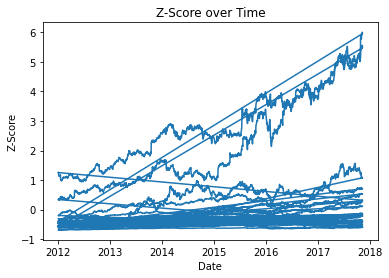

In [ ]:
# Plot the z-score column over time
plt.plot(closedf_filtered_indexAsDate.index, closedf_filtered_indexAsDate['z_score'])
plt.title('Z-Score over Time')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.show()

Using Box plot to check for outliers

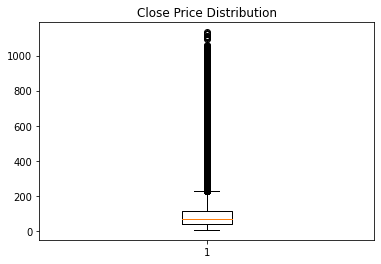

In [ ]:
# create boxplot
plt.boxplot(closedf_filtered_indexAsDate['Close'])
plt.title('Close Price Distribution')
plt.show()

a boxplot shows the distribution of values in the "Close" column, with any outliers represented as points beyond the whiskers of the boxplot.

## EXamining the distribution of stock price

## To Explore the dataset, using summary statistics, histograms, and scatter plots subplots for histograms and scatter plots

In [ ]:
# Analyze the summary statistics of numerical columns
num_cols = ["Open", "High", "Low", "Close", "Volume"]
display(data_df[num_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
Open,154261.0,4.102117e+01,8.887763e+01,0.00821,3.605200e+00,18.972,4.228000e+01,1.126100e+03
High,154261.0,4.145348e+01,8.961372e+01,0.00821,3.653400e+00,19.231,4.276300e+01,1.135540e+03
Low,154261.0,4.057142e+01,8.804949e+01,0.00821,3.561100e+00,18.703,4.183700e+01,1.124060e+03
Close,154261.0,4.102505e+01,8.886192e+01,0.00821,3.605200e+00,18.974,4.230800e+01,1.132880e+03
Volume,154261.0,2.079785e+07,4.609613e+07,0.00000,3.124120e+06,7027200.000,1.579623e+07,2.423735e+09


In [ ]:
display(data_df[num_cols].describe())

,Open,High,Low,Close,Volume
count,154261.000000,154261.000000,154261.000000,154261.000000,1.542610e+05
mean,41.021169,41.453477,40.571423,41.025055,2.079785e+07
std,88.877632,89.613721,88.049487,88.861922,4.609613e+07
min,0.008210,0.008210,0.008210,0.008210,0.000000e+00
25%,3.605200,3.653400,3.561100,3.605200,3.124120e+06
50%,18.972000,19.231000,18.703000,18.974000,7.027200e+06
75%,42.280000,42.763000,41.837000,42.308000,1.579623e+07
max,1126.100000,1135.540000,1124.060000,1132.880000,2.423735e+09


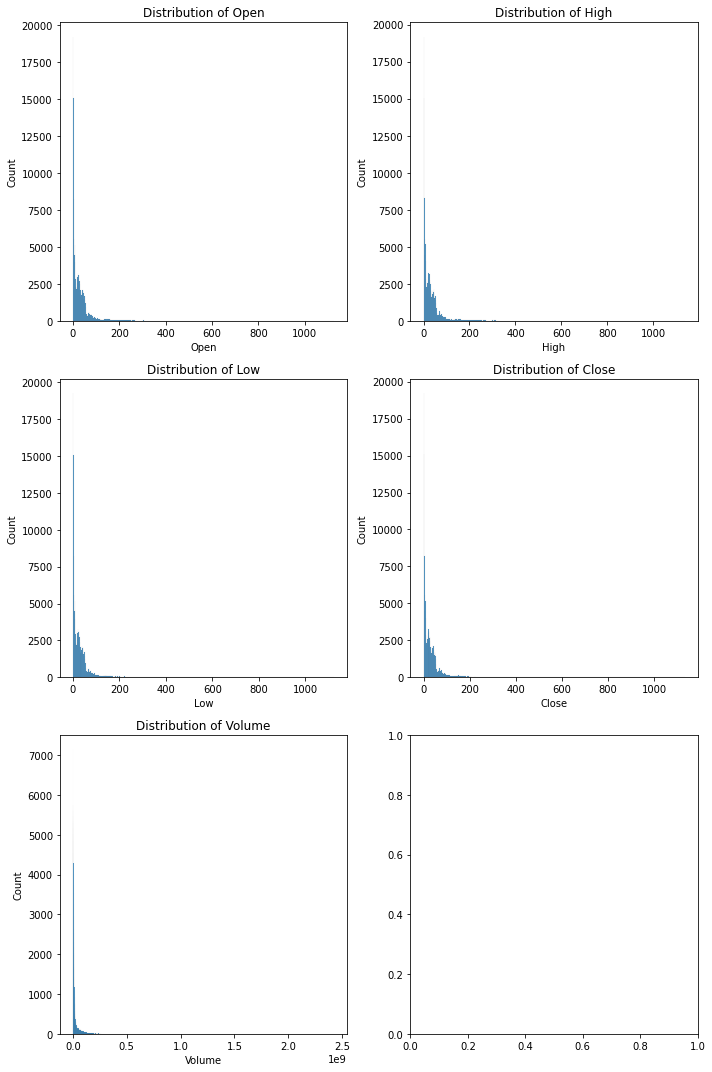

In [ ]:
# Visualize the distribution of numerical columns in two plots per row
num_cols_len = len(num_cols)
num_rows = num_cols_len // 2 + num_cols_len % 2
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 5*num_rows))

for i, col in enumerate(num_cols):
    sns.histplot(data_df[col], ax=axs.flatten()[i])
    axs.flatten()[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


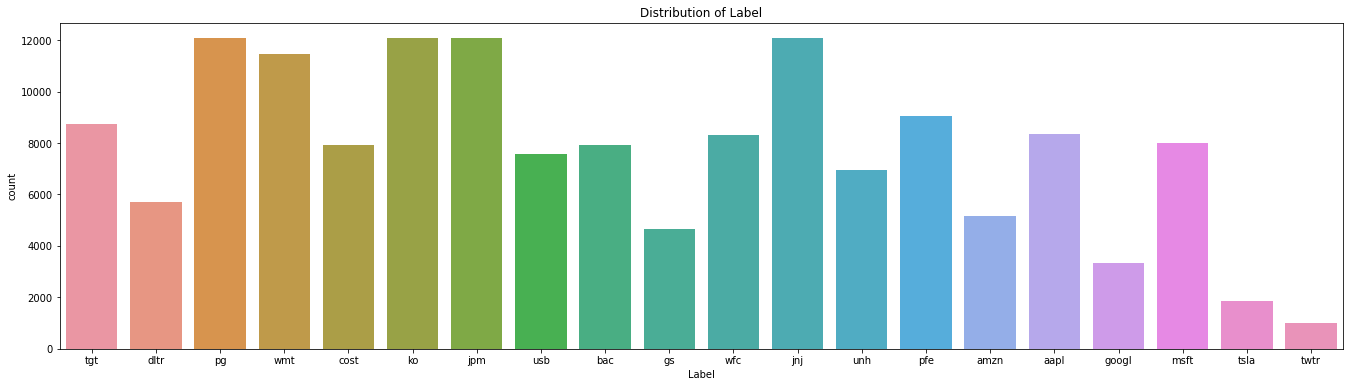

In [ ]:
# Visualize the distribution of categorical column
plt.figure(figsize=(23, 6))
sns.countplot(data_df["Label"])
plt.title("Distribution of Label")
plt.show()

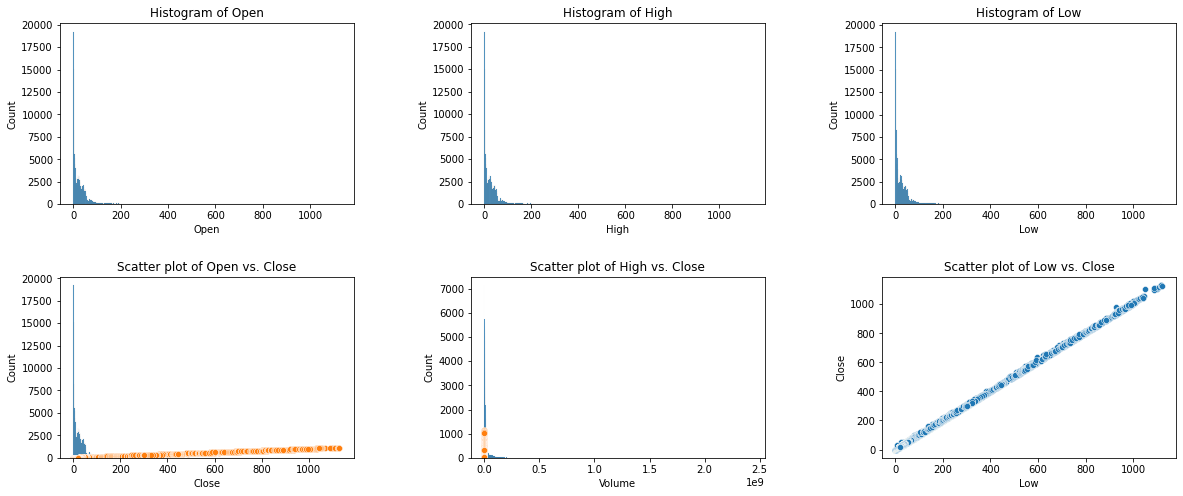

In [ ]:
# Define the numerical columns to explore
num_cols = ["Open", "High", "Low", "Close", "Volume"]

# Create subplots for histograms and scatter plots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# Plot histograms of numerical columns
for i, col in enumerate(num_cols):
    sns.histplot(data_df[col], ax=axs[i//3, i%3], kde=False)
    axs[i//3, i%3].set_title(f"Histogram of {col}")

# Plot scatter plots of numerical columns
sns.scatterplot(x="Open", y="Close", data=data_df, ax=axs[1, 0])
axs[1, 0].set_title("Scatter plot of Open vs. Close")

sns.scatterplot(x="High", y="Close", data=data_df, ax=axs[1, 1])
axs[1, 1].set_title("Scatter plot of High vs. Close")

sns.scatterplot(x="Low", y="Close", data=data_df, ax=axs[1, 2])
axs[1, 2].set_title("Scatter plot of Low vs. Close")

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Display the plots
plt.show()

## Visualize the distribution of each numerical column: 
Use histograms, box plots, or kernel density plots to visualize the distribution of each numerical column. These plots will help you identify the center, spread, skewness, and potential outliers of the data.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

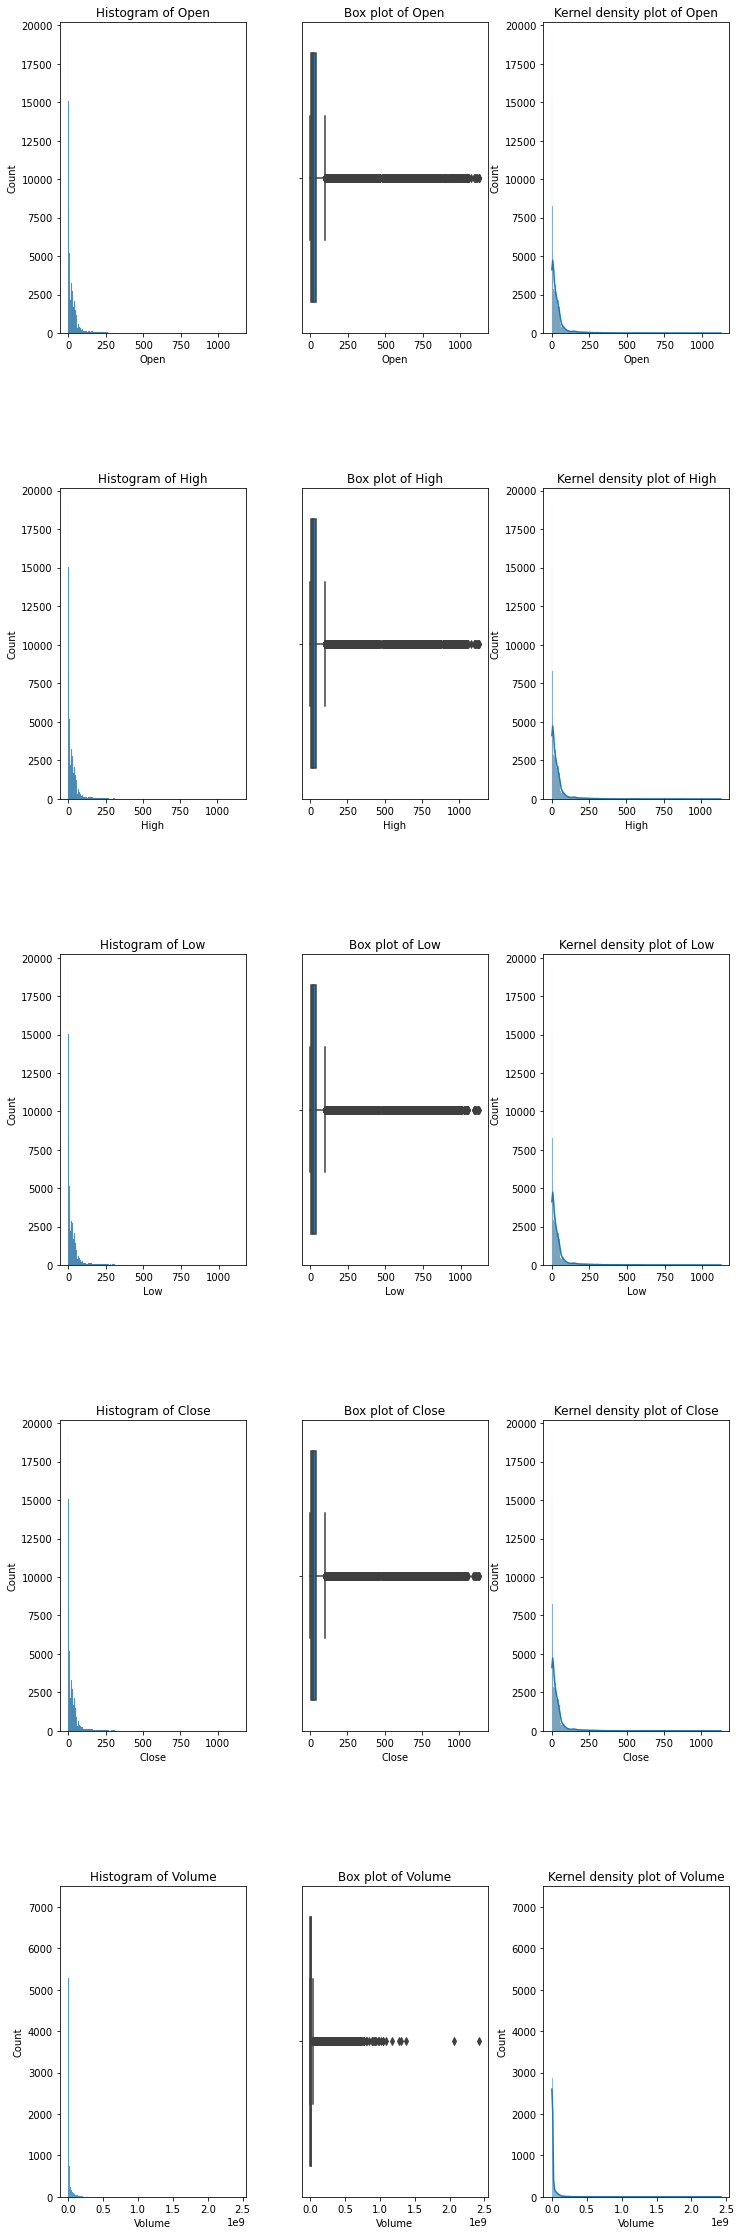

In [ ]:

# Define the numerical columns to visualize
num_cols = ["Open", "High", "Low", "Close", "Volume"]

# Create subplots for histograms, box plots, and kernel density plots
fig, axs = plt.subplots(nrows=len(num_cols), ncols=3, figsize=(12, 8*len(num_cols)))

# Plot histograms, box plots, and kernel density plots of numerical columns
for i, col in enumerate(num_cols):
    # Histogram
    sns.histplot(data_df[col], ax=axs[i, 0], kde=False)
    axs[i, 0].set_title(f"Histogram of {col}")
    
    # Box plot
    sns.boxplot(data_df[col], ax=axs[i, 1])
    axs[i, 1].set_title(f"Box plot of {col}")
    
    # Kernel density plot
    sns.histplot(data_df[col], ax=axs[i, 2], kde=True)
    # sns.kdeplot(data_df[col], ax=axs[i, 2])
    axs[i, 2].set_title(f"Kernel density plot of {col}")

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Display the plots
plt.show();

to Examine correlations: Check for correlations between the numerical columns 

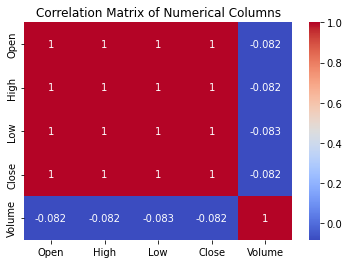

In [ ]:
# Create a correlation matrix of the numerical columns
corr_matrix = data_df[num_cols].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

## autocorrelation in time series data



the lag_plot function is a useful tool for visualizing and identifying autocorrelation in time series data, and can be used to inform the selection of appropriate time series models and forecasting methods.

In [ ]:
def autocorrelation_analysis(labelname):
    # Filter the 'Close' column by labelname like 'amzn'
    close_lbl = data_df.loc[data_df['Label'] == labelname]

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

    # Plot lag plot for Close column in first subplot
    lag_plot(close_lbl['Close'], lag=5, ax=axes[0])

    # Set title and axis labels for first subplot
    axes[0].set_title('For Close Column')
    axes[0].set_xlabel('Close(t)')
    axes[0].set_ylabel('Close(t+1)')

    # Plot lag plot for Open column in second subplot
    lag_plot(close_lbl['Open'], lag=5, ax=axes[1])

    # Set title and axis labels for second subplot
    axes[1].set_title('For Open Column')
    axes[1].set_xlabel('Open(t)')
    axes[1].set_ylabel('Open(t+1)')

    # Set title for the entire figure
    fig.suptitle(f'Lag Plots of {labelname} for analysing Autocorrelation with 5 lags', fontsize=16)

    # Display the plot
    plt.show()

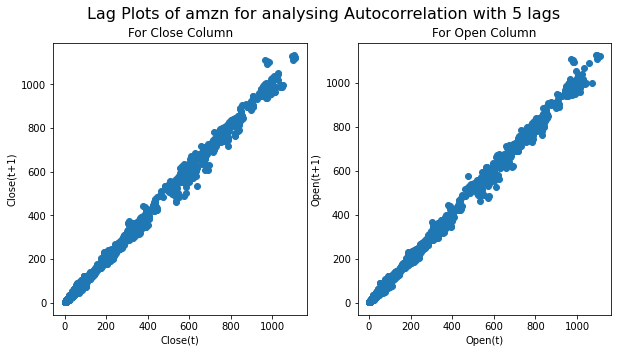

In [ ]:
autocorrelation_analysis('amzn')

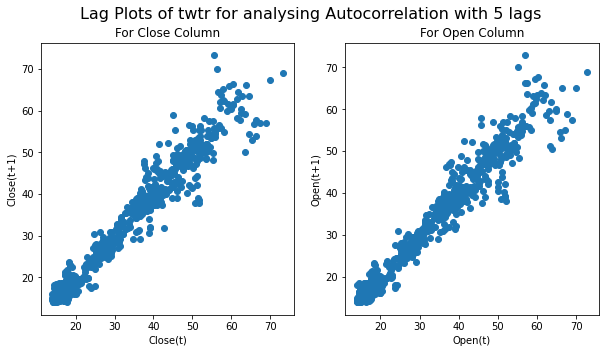

In [ ]:
autocorrelation_analysis('twtr')

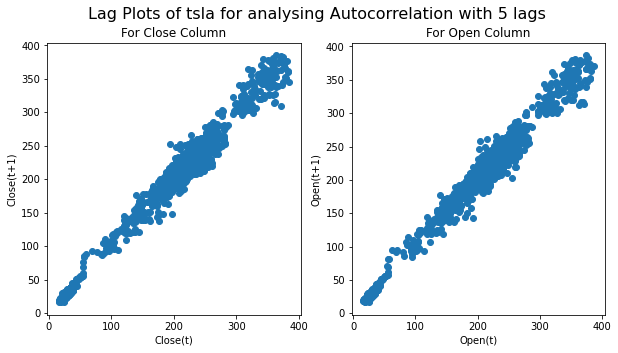

In [ ]:
autocorrelation_analysis('tsla')

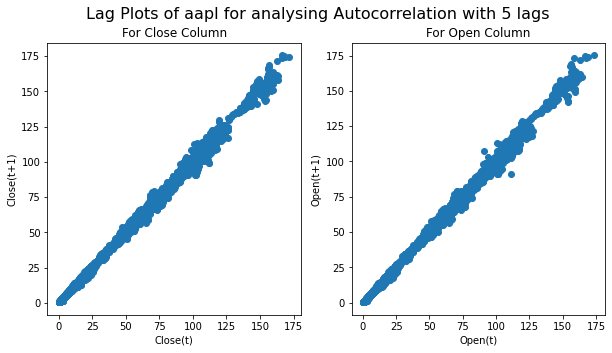

In [ ]:
autocorrelation_analysis('aapl')

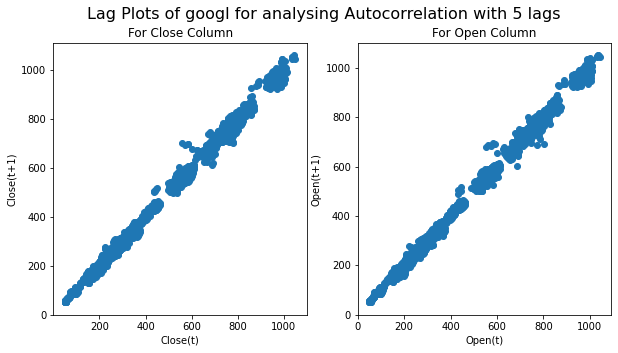

In [ ]:
autocorrelation_analysis('googl')

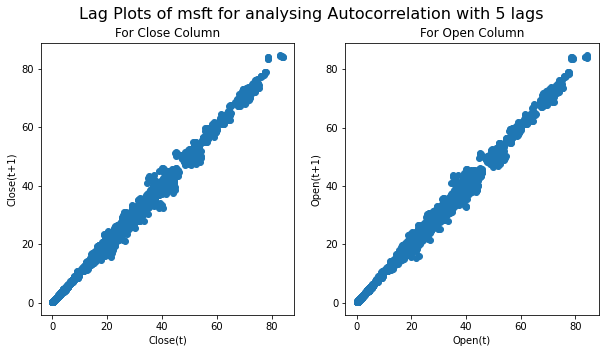

In [ ]:
autocorrelation_analysis('msft')

# Analysis of Trend, seasonality, stationary in dataset

In [ ]:
#plot close price
close_df = data_df.pivot_table(values='Close',index = 'Date', columns=['Label'])
display(close_df.head())

Label,aapl,amzn,bac,cost,dltr,googl,gs,jnj,jpm,ko,msft,pfe,pg,tgt,tsla,twtr,unh,usb,wfc,wmt
Date,,,,,,,,,,,,,,,,,,,,
1970-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5941,3.1254,0.6975,NaN,NaN,1.3796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5776,3.1254,0.6894,NaN,NaN,1.3875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5864,3.1588,0.6934,NaN,NaN,1.3796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5864,3.2337,0.6975,NaN,NaN,1.4039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5941,3.2254,0.7016,NaN,NaN,1.4198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
close_df2 = close_df[close_df.index > pd.Timestamp('2012-01-01')]
colnames = list(close_df2.columns)
print(colnames)
colnames[0]

['aapl', 'amzn', 'bac', 'cost', 'dltr', 'googl', 'gs', 'jnj', 'jpm', 'ko', 'msft', 'pfe', 'pg', 'tgt', 'tsla', 'twtr', 'unh', 'usb', 'wfc', 'wmt']


'aapl'

Text(0.5, 1.0, 'Plotting Close Price Stocks by year')

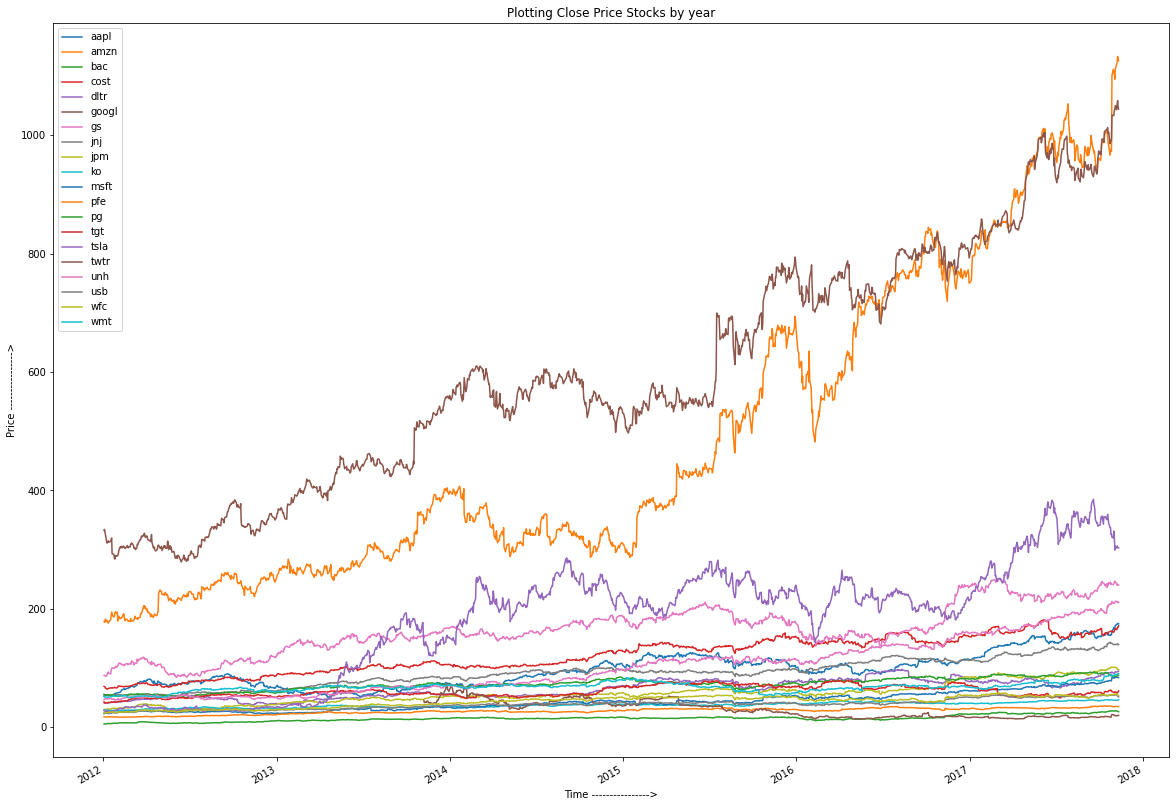

In [ ]:
close_df2[colnames].plot(figsize=(20,15))
plt.legend(loc="best")
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Close Price Stocks by year")

## Trend Analysis

In [ ]:
data_columns=colnames[:] ## Providing a deepcopy of list
close_5d_rol_df = close_df2[data_columns].rolling(window = 5, center = True).mean()
close_10d_rol_df = close_df2[data_columns].rolling(window = 10, center = True).mean()
close_30d_rol_df = close_df2[data_columns].rolling(window = 30, center = True).mean()
close_60d_rol_df = close_df2[data_columns].rolling(window = 60, center = True).mean()
# 250 day considered as annual for stock
close_250d_rol_df = close_df2[data_columns].rolling(window = 250, center = True).mean()


In [ ]:
def trend_plot(col):
    fig, ax = plt.subplots(figsize = (20,4))

    # plotting daily data
    ax.plot(close_df2[col], marker='.', markersize=4, linestyle='None', label='Daily')
    
    # plotting 5-day rolling data
#     ax.plot(close_5d_rol_df[col], linewidth=2, label='5-day Rolling Mean')
    # plotting 10-day rolling data
    ax.plot(close_10d_rol_df[col], linewidth=3, label='Trend (10-day Rolling Mean)')
    # plotting 30-day rolling data
    ax.plot(close_30d_rol_df[col], linewidth=3, label='30-day Rolling Mean')
    # plotting 60-day rolling data
#     ax.plot(close_60d_rol_df[col], linewidth=2, label='60-day Rolling Mean')
    # plotting annual rolling data
    ax.plot(close_250d_rol_df[col], color='0.2', linewidth=3, label='Trend (250-day Rolling Mean)')

    # Beautification of plot
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Price')
    ax.set_title('Trends of Close price of {0} stock'.format(col))


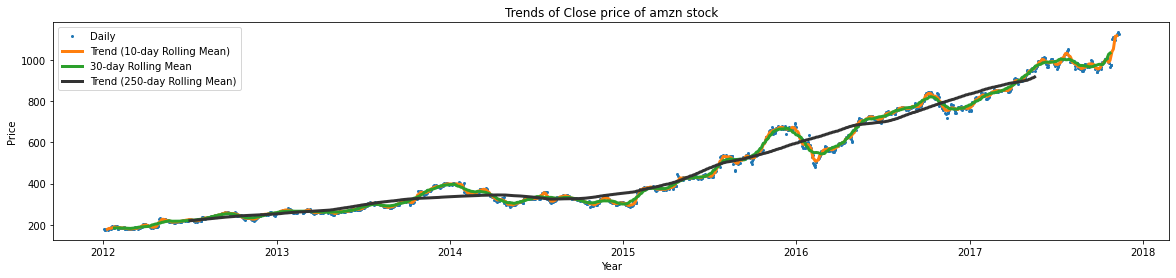

In [ ]:
trend_plot('amzn')

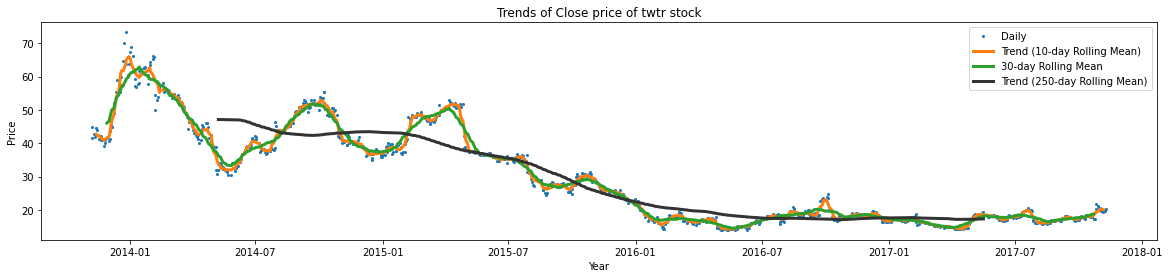

In [ ]:
trend_plot('twtr')

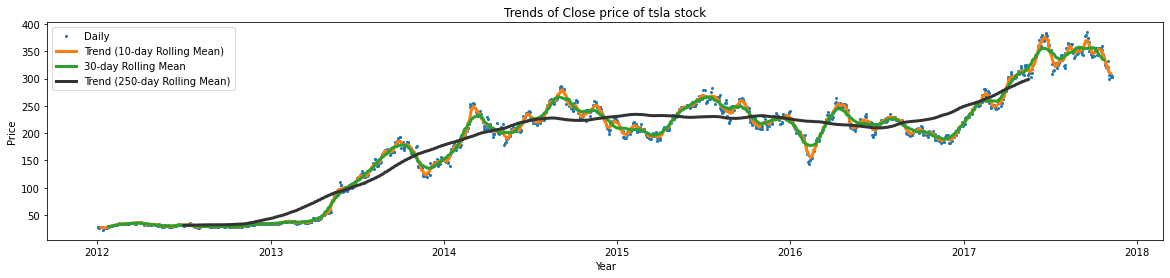

In [ ]:
trend_plot('tsla')

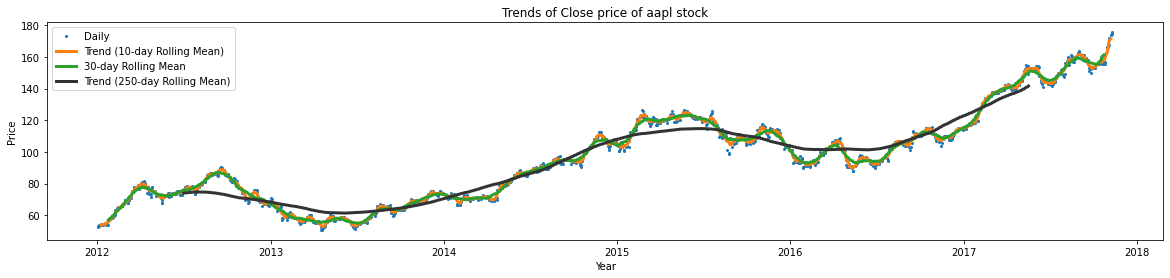

In [ ]:
trend_plot('aapl')

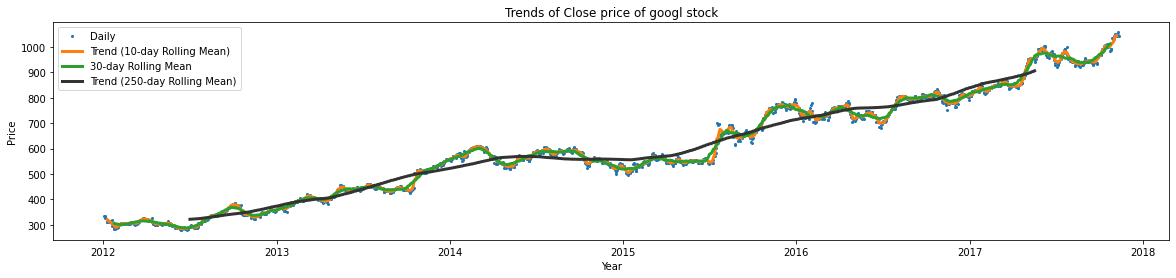

In [ ]:
trend_plot('googl')

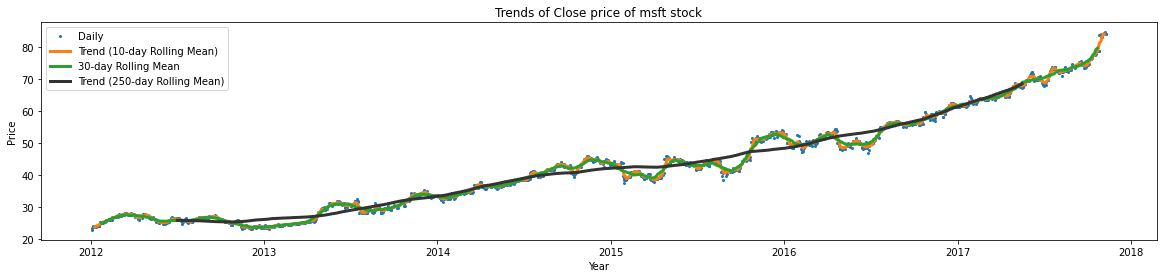

In [ ]:
trend_plot('msft')

## Testing Stationary

### Checking stationary for particular stocks

In [ ]:
def checkStationaryForLabel(labelname):
  labelStckClsePrice_df = data_df.groupby('Label').get_group(labelname).groupby('Close').filter(lambda x: len(x) > 1)

  # create a plot of the closing prices over time
  plt.plot(labelStckClsePrice_df['Close'])
  plt.title(f'Closing Prices Over Time for {labelname}')
  plt.xlabel('Time')
  plt.ylabel('Closing Price')
  plt.show()

  # create a plot of the autocorrelation function and partial autocorrelation function
  fig, ax = plt.subplots(2,1,figsize=(10,6))
  plot_acf(labelStckClsePrice_df['Close'], ax=ax[0])
  plot_pacf(labelStckClsePrice_df['Close'], ax=ax[1])
  plt.show()


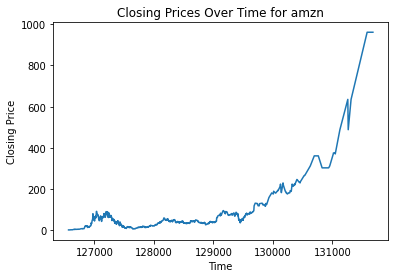

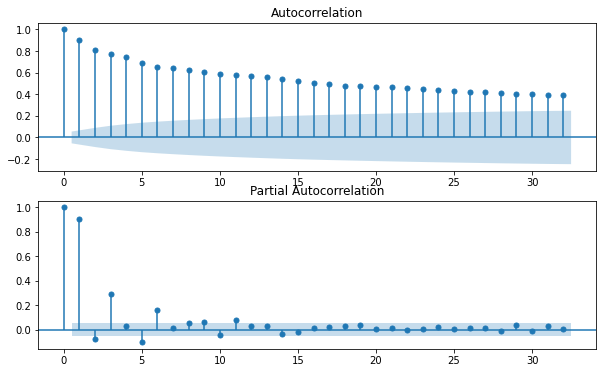

In [ ]:
checkStationaryForLabel('amzn')

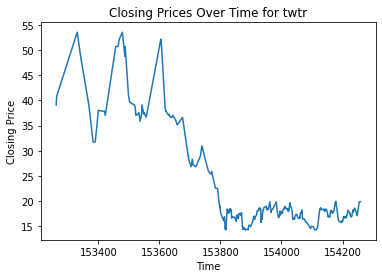

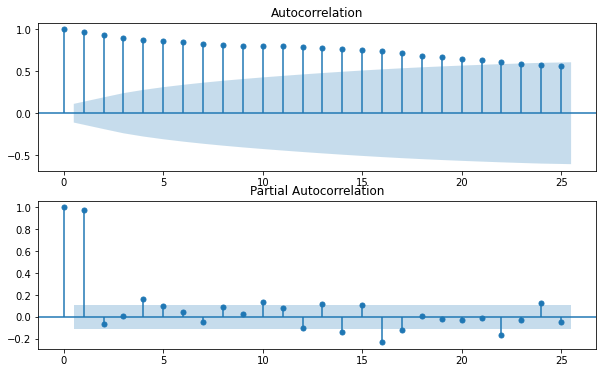

In [ ]:
checkStationaryForLabel('twtr')

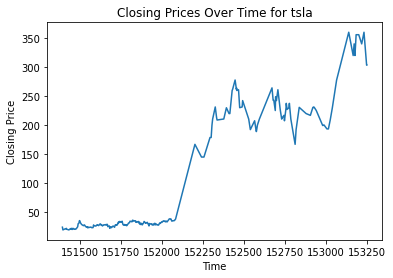

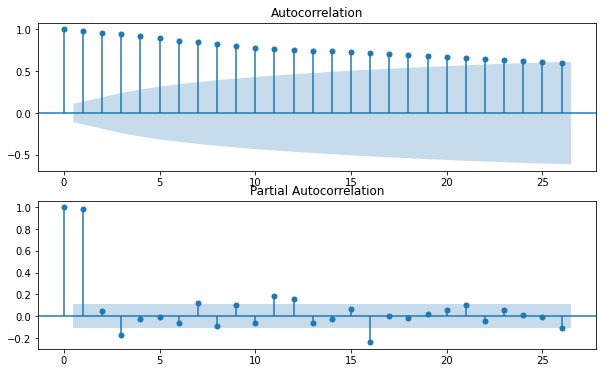

In [ ]:
checkStationaryForLabel('tsla')

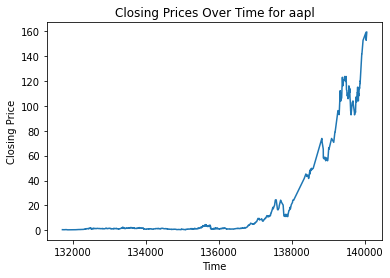

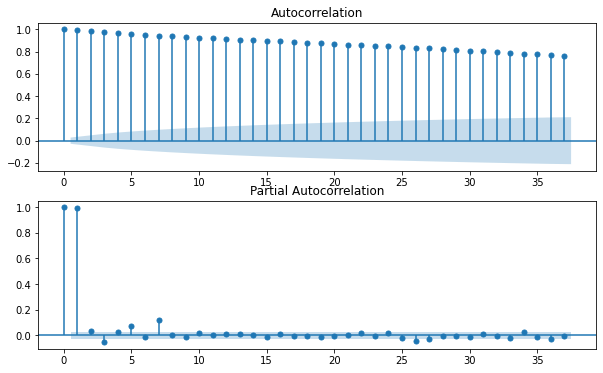

In [ ]:
checkStationaryForLabel('aapl')

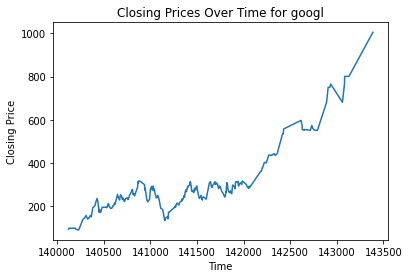

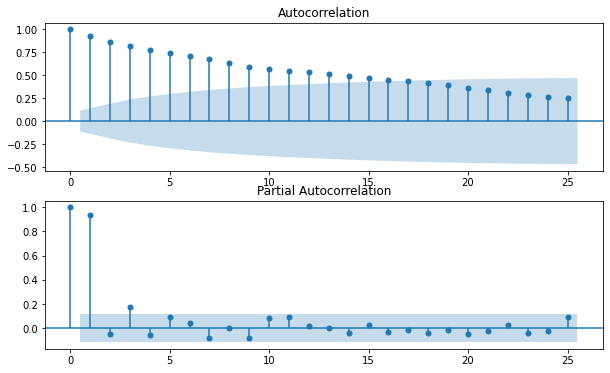

In [ ]:
checkStationaryForLabel('googl')

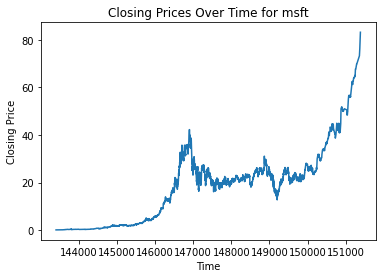

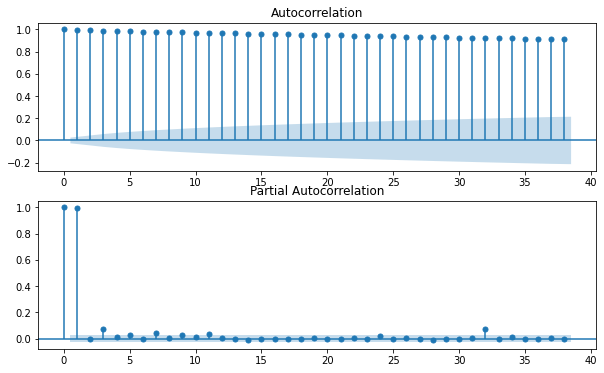

In [ ]:
checkStationaryForLabel('msft')

# Testing Seasonality

In [ ]:
labelStckClsePrice_df = data_df.groupby('Label').get_group('msft').groupby('Close').filter(lambda x: len(x) > 1)
display(labelStckClsePrice_df.head())

,Date,Open,High,Low,Close,Volume,Label
143409,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,msft
143410,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,msft
143411,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,msft
143412,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,msft
143413,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,msft


In [ ]:
# Set the 'Date' column as the index of the dataframe
labelStckClsePrice_df.set_index('Date', inplace=True)

In [ ]:
display(labelStckClsePrice_df.head())

,Open,High,Low,Close,Volume,Label
Date,,,,,,
1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,msft
1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,msft
1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,msft
1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,msft
1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,msft


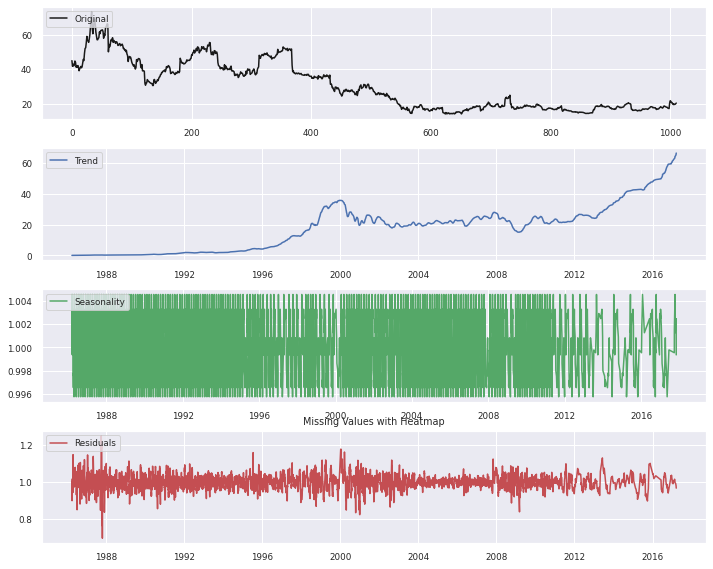

In [ ]:

# Perform time series decomposition
result = seasonal_decompose(labelStckClsePrice_df['Close'], model='multiplicative', period=30)

# Plot the decomposition results
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,8))
axes[0].plot(df['Close'], 'k', label='Original')
axes[0].legend(loc='upper left')
axes[1].plot(result.trend, 'b', label='Trend')
axes[1].legend(loc='upper left')
axes[2].plot(result.seasonal, 'g', label='Seasonality')
axes[2].legend(loc='upper left')
axes[3].plot(result.resid, 'r', label='Residuals')
axes[3].legend(loc='upper left')
plt.tight_layout()

# set plot title
plt.title("Missing Values with Heatmap")

# Show the plot
plt.show()

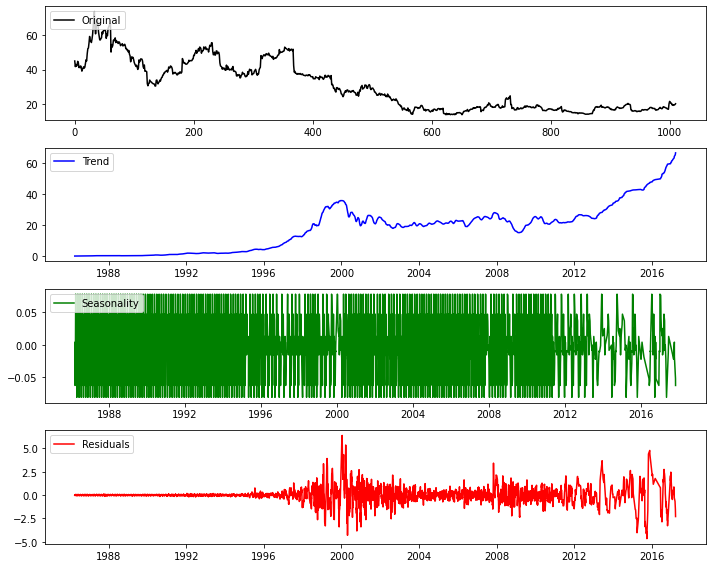

In [ ]:

# Perform time series decomposition
result = seasonal_decompose(labelStckClsePrice_df['Close'], model='additive', period=30)

# Plot the decomposition results
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,8))
axes[0].plot(df['Close'], 'k', label='Original')
axes[0].legend(loc='upper left')
axes[1].plot(result.trend, 'b', label='Trend')
axes[1].legend(loc='upper left')
axes[2].plot(result.seasonal, 'g', label='Seasonality')
axes[2].legend(loc='upper left')
axes[3].plot(result.resid, 'r', label='Residuals')
axes[3].legend(loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
def seaonality_analyse(labelname):
    labelStckClsePrice_df = data_df.groupby('Label').get_group(labelname).groupby('Close').filter(lambda x: len(x) > 1)

    # Set the 'Date' column as the index of the dataframe
    labelStckClsePrice_df.set_index('Date', inplace=True)

    # Perform time series decomposition
    multiplicative_result = seasonal_decompose(df['Close'], model='multiplicative', period=30)
    additive_result = seasonal_decompose(df['Close'], model='additive', period=30)


    # Plot the decomposition results
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,8))
    fig.suptitle(f"Result of Seasonality Decomposition for {labelname}", fontsize=16)
    axes[0,0].plot(labelStckClsePrice_df['Close'], 'k', label='Original')
    axes[0,0].legend(loc='upper left')
    axes[0,1].plot(labelStckClsePrice_df['Close'], 'k', label='Original')
    axes[0,1].legend(loc='upper left')

    axes[1,0].plot(multiplicative_result.trend, 'b', label='Trend')
    axes[1,0].legend(loc='upper left')
    axes[1,1].plot(additive_result.trend, 'b', label='Trend')
    axes[1,1].legend(loc='upper left')

    axes[2,0].plot(multiplicative_result.seasonal, 'g', label='Seasonality')
    axes[2,0].legend(loc='upper left')
    axes[2,1].plot(additive_result.seasonal, 'g', label='Seasonality')
    axes[2,1].legend(loc='upper left')

    axes[3,0].plot(multiplicative_result.resid, 'r', label='Residuals')
    axes[3,0].legend(loc='upper left')
    axes[3,1].plot(additive_result.resid, 'r', label='Residuals')
    axes[3,1].legend(loc='upper left')

    plt.tight_layout()

    # Show the plot
    plt.show()

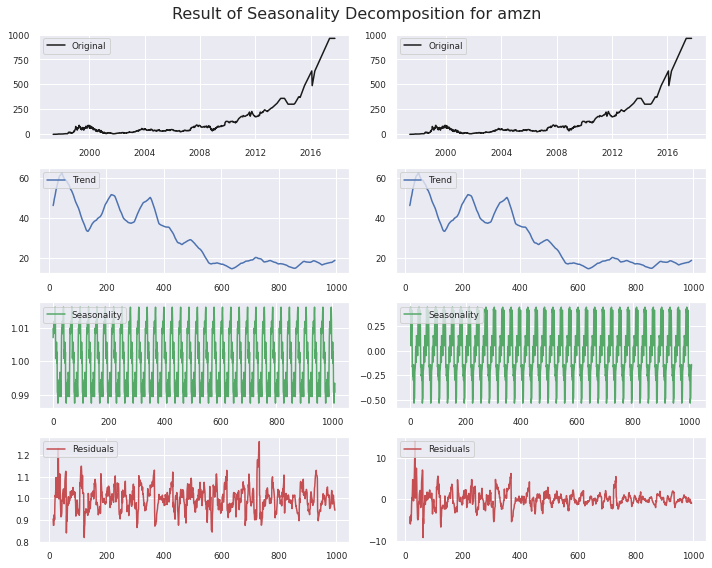

In [ ]:
seaonality_analyse('amzn')

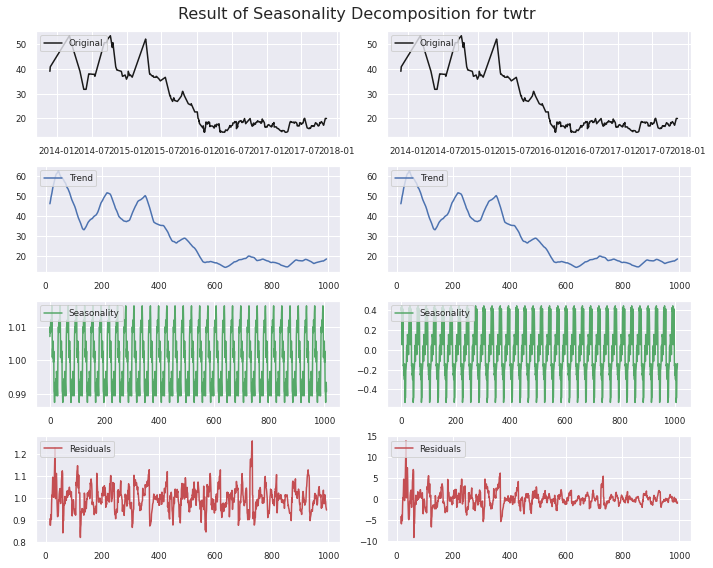

In [ ]:
seaonality_analyse('twtr')

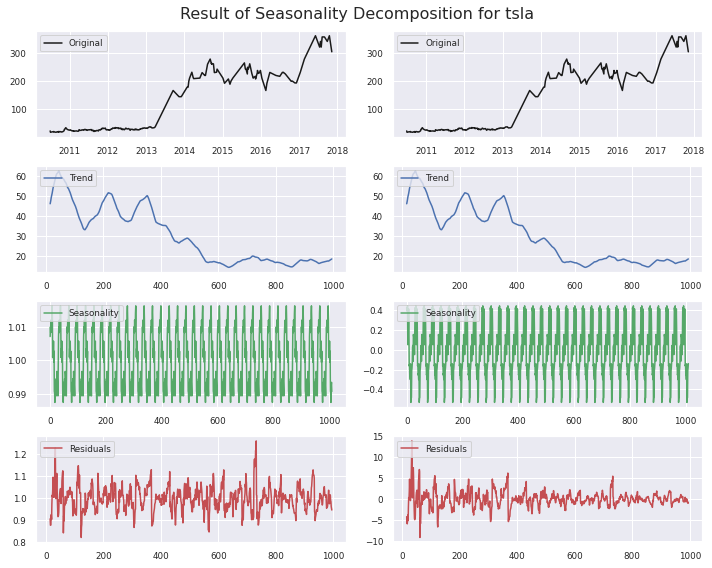

In [ ]:
seaonality_analyse('tsla')

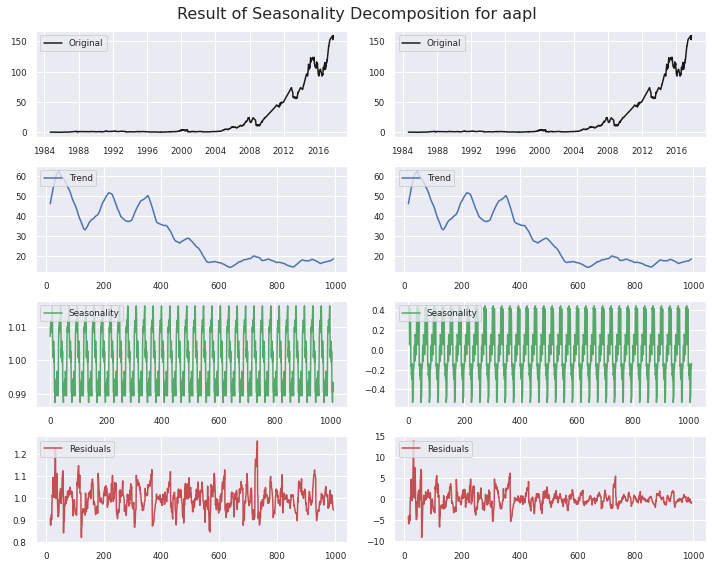

In [ ]:
seaonality_analyse('aapl')

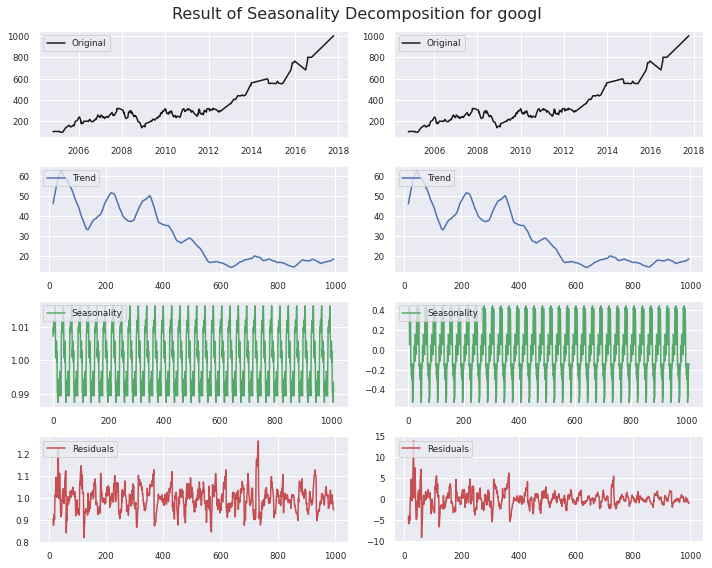

In [ ]:
seaonality_analyse('googl')

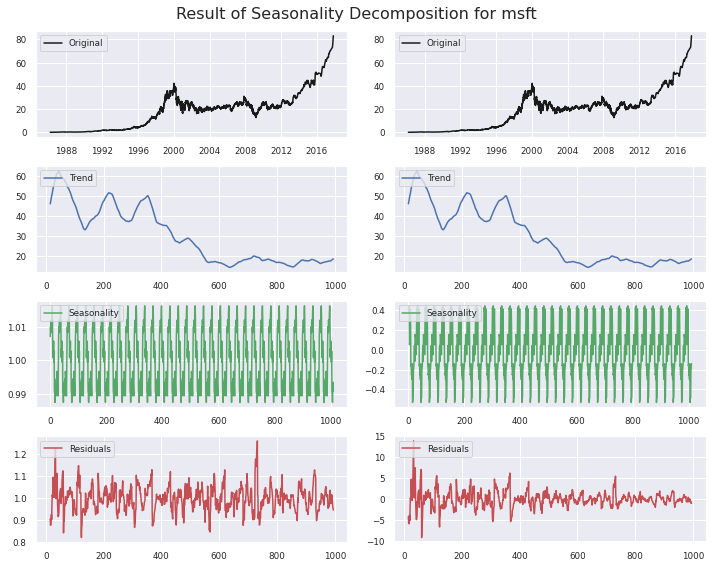

In [ ]:
seaonality_analyse('msft')

In [ ]:
# Filter the 'Close' column by 'amzn' label
close_amzn = data_df.loc[data_df['Label'] == 'amzn']
close_amzn.head()

,Date,Open,High,Low,Close,Volume,Label
126559,1997-05-16,1.97,1.98,1.71,1.73,14700000,amzn
126560,1997-05-19,1.76,1.77,1.62,1.71,6106800,amzn
126561,1997-05-20,1.73,1.75,1.64,1.64,5467200,amzn
126562,1997-05-21,1.64,1.65,1.38,1.43,18853200,amzn
126563,1997-05-22,1.44,1.45,1.31,1.40,11776800,amzn


In [ ]:
# Filter the 'Close' column by 'amzn' label
close_amzn = data_df.loc[data_df['Label'] == 'amzn']['Close']
close_amzn.head()

126559    1.73
126560    1.71
126561    1.64
126562    1.43
126563    1.40
Name: Close, dtype: float64

# Data preprocessing

## Feature Extraction

### Extracting Technical Indicators Using ta

In [ ]:
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29106 sha256=765bf37aac712fb5476e13a4015f5dc4aea2f0f18a167126c9e083345a983112
  Stored in directory: /root/.cache/pip/wheels/1b/81/50/db21d9643326c61dd6fee1dc2562d8351ee7753164c24ead38
Successfully built ta


In [ ]:
import ta

In [ ]:
ta_df = data_df.copy()
# Calculate the moving average
ta_df['SMA'] = ta.trend.sma_indicator(ta_df['Close'], window=20)

# Calculate the RSI
ta_df['RSI'] = ta.momentum.rsi(ta_df['Close'], window=14)

# Calculate the Bollinger Bands
ta_df['BB_upper'], ta_df['BB_middle'], ta_df['BB_lower'] = ta.volatility.bollinger_hband_indicator(ta_df['Close']), ta.volatility.bollinger_mavg(ta_df['Close']), ta.volatility.bollinger_lband_indicator(ta_df['Close'])
display(ta_df.head())

,Date,Open,High,Low,Close,Volume,Label,SMA,RSI,BB_upper,BB_middle,BB_lower
0,1983-04-06,1.6351,1.6434,1.6269,1.6434,2170898,tgt,NaN,NaN,0.0,NaN,0.0
1,1983-04-07,1.6598,1.7093,1.6598,1.7016,3699535,tgt,NaN,NaN,0.0,NaN,0.0
2,1983-04-08,1.7016,1.7093,1.7016,1.7016,2816067,tgt,NaN,NaN,0.0,NaN,0.0
3,1983-04-11,1.7016,1.7260,1.6928,1.7176,1299052,tgt,NaN,NaN,0.0,NaN,0.0
4,1983-04-12,1.7176,1.7424,1.7176,1.7424,2365608,tgt,NaN,NaN,0.0,NaN,0.0


In [ ]:
display(ta_df.sample(5).T)

,86175,58943,76176,26407,43516
Date,2002-01-18 00:00:00,1974-01-07 00:00:00,2012-05-07 00:00:00,2017-06-19 00:00:00,2008-07-30 00:00:00
Open,80.498,2.4006,27.636,88.242,50.012
High,81.231,2.4754,28.162,88.498,51.334
Low,79.787,2.3919,27.636,87.852,49.964
Close,80.69,2.4502,27.976,88.498,51.008
Volume,2964263,143163,11134707,5326216,14864697
Label,gs,jpm,usb,pg,cost
SMA,83.20485,2.12155,27.7217,86.71835,55.7768
RSI,44.898471,72.069254,55.082091,70.553743,38.632798
BB_upper,0.0,1.0,0.0,0.0,0.0


In [ ]:
featureExtract_df = data_df.copy()
close = np.array(featureExtract_df['Close'])
return_raw_prev1 = (close[1:]- close[:-1]) / close[:-1]

# These are like, if you bought stock yesterday and sold it today, what's your ROI
featureExtract_df['ReturnsRawPrev1'] = None
featureExtract_df['ReturnsRawPrev1'][1:] = return_raw_prev1
return_raw_prev5 = (close[5:] - close[:-5]) / close[:-5]

featureExtract_df['ReturnsRawPrev5'] = None
featureExtract_df['ReturnsRawPrev5'][5:] = return_raw_prev5
return_raw_prev10 = (close[10:] - close[:-10]) / close[:-10]

featureExtract_df['ReturnsRawPrev10'] = None
featureExtract_df['ReturnsRawPrev10'][10:] = return_raw_prev10

# This is if you buy stock today and sell it tomorrow, what will your return be? Target variable you want to predict
featureExtract_df['ReturnsRawFut1'] = None
featureExtract_df['ReturnsRawFut1'][:-1] = return_raw_prev1
featureExtract_df['ReturnsRawFut5'] = None
featureExtract_df['ReturnsRawFut5'][:-5] = return_raw_prev5
featureExtract_df['ReturnsRawFut10'] = None
featureExtract_df['ReturnsRawFut10'][:-10] = return_raw_prev10

display(featureExtract_df.head())

<ipython-input-86-be1f674e7ff3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featureExtract_df['ReturnsRawPrev1'][1:] = return_raw_prev1
<ipython-input-86-be1f674e7ff3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featureExtract_df['ReturnsRawPrev5'][5:] = return_raw_prev5
<ipython-input-86-be1f674e7ff3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featureExtract_df['ReturnsRawPrev10'][10:] = return_raw_prev10
<ipython-in

,Date,Open,High,Low,Close,Volume,Label,ReturnsRawPrev1,ReturnsRawPrev5,ReturnsRawPrev10,ReturnsRawFut1,ReturnsRawFut5,ReturnsRawFut10
0,1983-04-06,1.6351,1.6434,1.6269,1.6434,2170898,tgt,None,None,None,0.035414,0.090422,0.070403
1,1983-04-07,1.6598,1.7093,1.6598,1.7016,3699535,tgt,0.035414,None,None,0.0,0.048307,0.009403
2,1983-04-08,1.7016,1.7093,1.7016,1.7016,2816067,tgt,0.0,None,None,0.009403,0.019158,-0.005172
3,1983-04-11,1.7016,1.7260,1.6928,1.7176,1299052,tgt,0.009403,None,None,0.014439,0.004891,-0.028703
4,1983-04-12,1.7176,1.7424,1.7176,1.7424,2365608,tgt,0.014439,None,None,0.028466,-0.018997,-0.033058


### EXtracting manually and using FASTAI

In [ ]:
!pip install fastai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fastai.tabular.core import add_datepart

add_datepart(featureExtract_df, 'Date')
display(featureExtract_df.head())

,Open,High,Low,Close,Volume,Label,ReturnsRawPrev1,ReturnsRawPrev5,ReturnsRawPrev10,ReturnsRawFut1,ReturnsRawFut5,ReturnsRawFut10,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,1.6351,1.6434,1.6269,1.6434,2170898,tgt,None,None,None,0.035414,0.090422,0.070403,1983,4,14,6,2,96,False,False,False,False,False,False,418435200.0
1,1.6598,1.7093,1.6598,1.7016,3699535,tgt,0.035414,None,None,0.0,0.048307,0.009403,1983,4,14,7,3,97,False,False,False,False,False,False,418521600.0
2,1.7016,1.7093,1.7016,1.7016,2816067,tgt,0.0,None,None,0.009403,0.019158,-0.005172,1983,4,14,8,4,98,False,False,False,False,False,False,418608000.0
3,1.7016,1.7260,1.6928,1.7176,1299052,tgt,0.009403,None,None,0.014439,0.004891,-0.028703,1983,4,15,11,0,101,False,False,False,False,False,False,418867200.0
4,1.7176,1.7424,1.7176,1.7424,2365608,tgt,0.014439,None,None,0.028466,-0.018997,-0.033058,1983,4,15,12,1,102,False,False,False,False,False,False,418953600.0


In [ ]:
display(featureExtract_df.sample(5).T)

,28548,29832,814,99968,67348
Open,0.11906,1.241,2.8738,0.9441,43.98
High,0.12747,1.2496,2.9567,0.952,44.007
Low,0.11906,1.241,2.8738,0.9441,43.456
Close,0.12747,1.2496,2.9069,0.952,43.797
Volume,2650254,3139644,7091020,2046547,17311958
Label,wmt,wmt,tgt,jnj,jpm
ReturnsRawPrev1,0.070637,0.00693,0.014412,0.008368,-0.007388
ReturnsRawPrev5,0.0,0.020832,-0.008527,0.017203,0.000183
ReturnsRawPrev10,0.070637,0.028054,-0.013942,0.026083,0.070465
ReturnsRawFut1,0.0,-0.006882,0.0,0.008613,-0.008539


### Merging into single dataset for analysis

In [ ]:
analysis_data_df = pd.merge(ta_df, featureExtract_df, on=["Open", "High", "Low", "Close", "Volume", "Label"], how="outer")
display(analysis_data_df.head())

,Date,Open,High,Low,Close,Volume,Label,SMA,RSI,BB_upper,BB_middle,BB_lower,ReturnsRawPrev1,ReturnsRawPrev5,ReturnsRawPrev10,ReturnsRawFut1,ReturnsRawFut5,ReturnsRawFut10,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,1983-04-06,1.6351,1.6434,1.6269,1.6434,2170898,tgt,NaN,NaN,0.0,NaN,0.0,None,None,None,0.035414,0.090422,0.070403,1983,4,14,6,2,96,False,False,False,False,False,False,418435200.0
1,1983-04-07,1.6598,1.7093,1.6598,1.7016,3699535,tgt,NaN,NaN,0.0,NaN,0.0,0.035414,None,None,0.0,0.048307,0.009403,1983,4,14,7,3,97,False,False,False,False,False,False,418521600.0
2,1983-04-08,1.7016,1.7093,1.7016,1.7016,2816067,tgt,NaN,NaN,0.0,NaN,0.0,0.0,None,None,0.009403,0.019158,-0.005172,1983,4,14,8,4,98,False,False,False,False,False,False,418608000.0
3,1983-04-11,1.7016,1.7260,1.6928,1.7176,1299052,tgt,NaN,NaN,0.0,NaN,0.0,0.009403,None,None,0.014439,0.004891,-0.028703,1983,4,15,11,0,101,False,False,False,False,False,False,418867200.0
4,1983-04-12,1.7176,1.7424,1.7176,1.7424,2365608,tgt,NaN,NaN,0.0,NaN,0.0,0.014439,None,None,0.028466,-0.018997,-0.033058,1983,4,15,12,1,102,False,False,False,False,False,False,418953600.0


In [ ]:
analysis_data_df.shape

(159219, 31)

In [ ]:
analysis_data_df.dropna(inplace=True)
analysis_data_df.shape

(159190, 31)

In [ ]:
analysis_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159190 entries, 19 to 159208
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              159190 non-null  datetime64[ns]
 1   Open              159190 non-null  float64       
 2   High              159190 non-null  float64       
 3   Low               159190 non-null  float64       
 4   Close             159190 non-null  float64       
 5   Volume            159190 non-null  int64         
 6   Label             159190 non-null  object        
 7   SMA               159190 non-null  float64       
 8   RSI               159190 non-null  float64       
 9   BB_upper          159190 non-null  float64       
 10  BB_middle         159190 non-null  float64       
 11  BB_lower          159190 non-null  float64       
 12  ReturnsRawPrev1   159190 non-null  object        
 13  ReturnsRawPrev5   159190 non-null  object        
 14  Ret

# Feature Selection

## Using Correlation Analysis

In [ ]:
display(analysis_data_df.corr())

,Open,High,Low,Close,Volume,SMA,RSI,BB_upper,BB_middle,BB_lower,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
Open,1.000000,0.999951,0.999935,0.999898,-0.075504,0.992727,0.064296,0.015876,0.992727,-0.000492,0.421585,0.009990,0.009666,-0.000710,0.001950,0.009908,0.000771,0.001377,0.001516,-0.001436,-0.000751,NaN,0.421775
High,0.999951,1.000000,0.999912,0.999947,-0.075239,0.992726,0.064681,0.017027,0.992726,-0.000738,0.422054,0.009979,0.009665,-0.000710,0.001794,0.009899,0.000729,0.001444,0.001470,-0.001363,-0.000797,NaN,0.422244
Low,0.999935,0.999912,1.000000,0.999950,-0.075893,0.992621,0.065813,0.016579,0.992621,-0.001943,0.421328,0.010061,0.009725,-0.000653,0.001876,0.009982,0.000765,0.001365,0.001553,-0.001411,-0.000714,NaN,0.421520
Close,0.999898,0.999947,0.999950,1.000000,-0.075569,0.992641,0.066082,0.017591,0.992641,-0.002161,0.421676,0.010014,0.009684,-0.000757,0.001779,0.009929,0.000628,0.001455,0.001441,-0.001297,-0.000801,NaN,0.421866
Volume,-0.075504,-0.075239,-0.075893,-0.075569,1.000000,-0.071806,-0.003095,0.054663,-0.071806,0.054205,0.181856,-0.023524,-0.022177,-0.004274,0.012662,-0.023719,-0.003552,-0.001127,-0.005625,-0.001295,-0.008691,NaN,0.181305
SMA,0.992727,0.992726,0.992621,0.992641,-0.071806,1.000000,0.040580,0.009675,1.000000,0.008122,0.417756,0.008720,0.008452,-0.000915,0.001773,0.008638,0.000435,0.001331,0.001621,-0.001052,-0.001029,NaN,0.417917
RSI,0.064296,0.064681,0.065813,0.066082,-0.003095,0.040580,1.000000,0.332955,0.040580,-0.329612,0.077403,0.022386,0.019797,-0.014835,0.000244,0.020899,-0.005784,0.003288,-0.007928,-0.003041,0.004779,NaN,0.077870
BB_upper,0.015876,0.017027,0.016579,0.017591,0.054663,0.009675,0.332955,1.000000,0.009675,-0.060715,0.016078,-0.008030,-0.009601,-0.020730,0.003449,-0.009817,-0.007983,0.000467,-0.009005,-0.002457,-0.005231,NaN,0.015856
BB_middle,0.992727,0.992726,0.992621,0.992641,-0.071806,1.000000,0.040580,0.009675,1.000000,0.008122,0.417756,0.008720,0.008452,-0.000915,0.001773,0.008638,0.000435,0.001331,0.001621,-0.001052,-0.001029,NaN,0.417917
BB_lower,-0.000492,-0.000738,-0.001943,-0.002161,0.054205,0.008122,-0.329612,-0.060715,0.008122,1.000000,0.016374,-0.005047,-0.003938,-0.003088,0.002334,-0.005262,-0.003817,-0.007364,-0.001487,-0.001716,-0.005733,NaN,0.016253


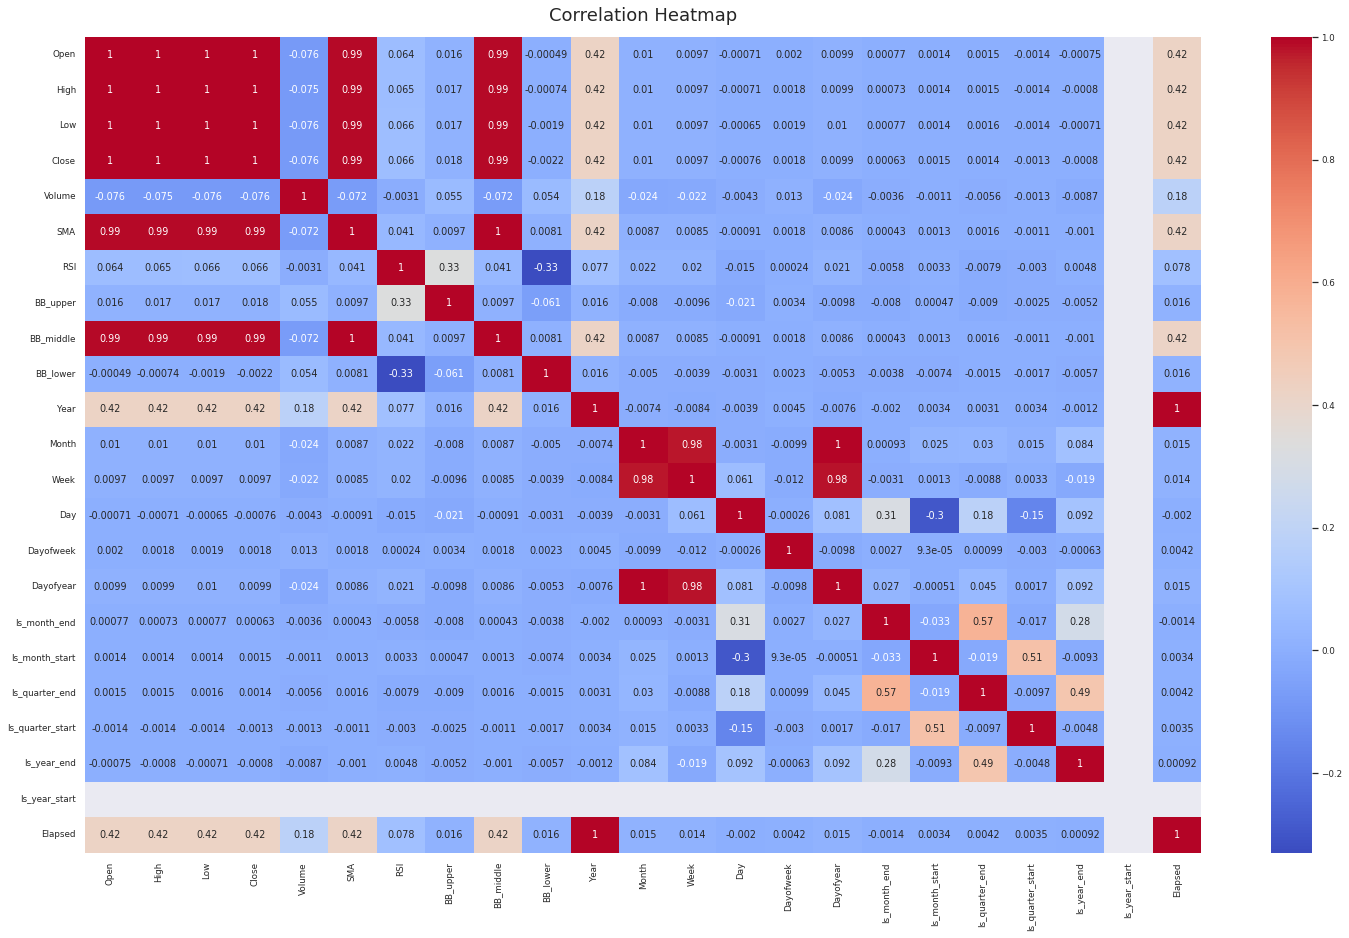

In [ ]:
# compute the correlation matrix
corr_matrix = analysis_data_df.corr()

# create a heatmap of the correlation matrix using seaborn
sns.set(font_scale=0.8)
fig, ax = plt.subplots(figsize=(25, 15))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=ax)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

## Using Feature Ranking

#### Using Correlation Analysis

In [ ]:
# select the columns to use for feature ranking
cols = ['Date','Open', 'High', 'Low', 'Close', 'Volume', 'Label', 'SMA', 'RSI',
       'BB_upper', 'BB_middle', 'BB_lower', 'ReturnsRawPrev1',
       'ReturnsRawPrev5', 'ReturnsRawPrev10', 'ReturnsRawFut1',
       'ReturnsRawFut5', 'ReturnsRawFut10', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed']
print(type(cols))
print(cols)

<class 'list'>
['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Label', 'SMA', 'RSI', 'BB_upper', 'BB_middle', 'BB_lower', 'ReturnsRawPrev1', 'ReturnsRawPrev5', 'ReturnsRawPrev10', 'ReturnsRawFut1', 'ReturnsRawFut5', 'ReturnsRawFut10', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed']


In [ ]:
# compute the correlation matrix with the target variable
corr_matrix = analysis_data_df[cols].corrwith(analysis_data_df["Close"])

# sort the correlation coefficients in descending order
ranked_features = corr_matrix.abs().sort_values(ascending=False)

# print the ranked features
print(ranked_features)

Close               1.000000
Low                 0.999950
High                0.999947
Open                0.999898
BB_middle           0.992641
SMA                 0.992641
Elapsed             0.421866
Year                0.421676
Volume              0.075569
RSI                 0.066082
BB_upper            0.017591
Month               0.010014
Dayofyear           0.009929
Week                0.009684
BB_lower            0.002161
Dayofweek           0.001779
Is_month_start      0.001455
Is_quarter_end      0.001441
Is_quarter_start    0.001297
Is_year_end         0.000801
Day                 0.000757
Is_month_end        0.000628
Is_year_start            NaN
dtype: float64


In [ ]:
# select the feature columns to keep
selected_features = ranked_features.index[6:]

# create a new correlation matrix and rank the remaining features
new_corr_matrix = analysis_data_df[selected_features].corrwith(analysis_data_df["Close"])
new_ranked_features = new_corr_matrix.abs().sort_values(ascending=False)

In [ ]:
# print the ranked features
print(new_ranked_features)

Elapsed             0.421866
Year                0.421676
Volume              0.075569
RSI                 0.066082
BB_upper            0.017591
Month               0.010014
Dayofyear           0.009929
Week                0.009684
BB_lower            0.002161
Dayofweek           0.001779
Is_month_start      0.001455
Is_quarter_end      0.001441
Is_quarter_start    0.001297
Is_year_end         0.000801
Day                 0.000757
Is_month_end        0.000628
Is_year_start            NaN
dtype: float64


In [ ]:
selectetd_features = list(new_ranked_features.index[:-1].values)
selectetd_features

['Elapsed',
 'Year',
 'Volume',
 'RSI',
 'BB_upper',
 'Month',
 'Dayofyear',
 'Week',
 'BB_lower',
 'Dayofweek',
 'Is_month_start',
 'Is_quarter_end',
 'Is_quarter_start',
 'Is_year_end',
 'Day',
 'Is_month_end']

In [ ]:
len(selectetd_features)

16

##### Filtering the stocks per Company wise - to find results seperately

##### Including Label to filter on for particular company

In [ ]:
all_cols = selectetd_features + ['Close', 'Label']
FinalModelAnalysis_df = analysis_data_df[all_cols]

##### Adding only Close price with selected features

In [ ]:
all_cols = selectetd_features + ['Close']
final_analysis_df = analysis_data_df[all_cols]
final_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159190 entries, 19 to 159208
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Elapsed           159190 non-null  float64
 1   Year              159190 non-null  int64  
 2   Volume            159190 non-null  int64  
 3   RSI               159190 non-null  float64
 4   BB_upper          159190 non-null  float64
 5   Month             159190 non-null  int64  
 6   Dayofyear         159190 non-null  int64  
 7   Week              159190 non-null  int64  
 8   BB_lower          159190 non-null  float64
 9   Dayofweek         159190 non-null  int64  
 10  Is_month_start    159190 non-null  bool   
 11  Is_quarter_end    159190 non-null  bool   
 12  Is_quarter_start  159190 non-null  bool   
 13  Is_year_end       159190 non-null  bool   
 14  Day               159190 non-null  int64  
 15  Is_month_end      159190 non-null  bool   
 16  Close             1

#### Select only the numerical columns

In [ ]:
# Select columns whose datatype is numerical
num_cols = final_analysis_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical columns
print(num_cols)

['Elapsed', 'Year', 'Volume', 'RSI', 'BB_upper', 'Month', 'Dayofyear', 'Week', 'BB_lower', 'Dayofweek', 'Day', 'Close']


In [ ]:
FinalModelAnalysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159190 entries, 19 to 159208
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Elapsed           159190 non-null  float64
 1   Year              159190 non-null  int64  
 2   Volume            159190 non-null  int64  
 3   RSI               159190 non-null  float64
 4   BB_upper          159190 non-null  float64
 5   Month             159190 non-null  int64  
 6   Dayofyear         159190 non-null  int64  
 7   Week              159190 non-null  int64  
 8   BB_lower          159190 non-null  float64
 9   Dayofweek         159190 non-null  int64  
 10  Is_month_start    159190 non-null  bool   
 11  Is_quarter_end    159190 non-null  bool   
 12  Is_quarter_start  159190 non-null  bool   
 13  Is_year_end       159190 non-null  bool   
 14  Day               159190 non-null  int64  
 15  Is_month_end      159190 non-null  bool   
 16  Close             1

##### Converting the bool to int for dataset with label columns

In [ ]:
FinalModelAnalysis_df = FinalModelAnalysis_df.astype({'Is_quarter_end': int, 'Is_month_start': int, "Is_month_end": int, 'Is_quarter_start':int, 'Is_year_end':int})  
FinalModelAnalysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159190 entries, 19 to 159208
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Elapsed           159190 non-null  float64
 1   Year              159190 non-null  int64  
 2   Volume            159190 non-null  int64  
 3   RSI               159190 non-null  float64
 4   BB_upper          159190 non-null  float64
 5   Month             159190 non-null  int64  
 6   Dayofyear         159190 non-null  int64  
 7   Week              159190 non-null  int64  
 8   BB_lower          159190 non-null  float64
 9   Dayofweek         159190 non-null  int64  
 10  Is_month_start    159190 non-null  int64  
 11  Is_quarter_end    159190 non-null  int64  
 12  Is_quarter_start  159190 non-null  int64  
 13  Is_year_end       159190 non-null  int64  
 14  Day               159190 non-null  int64  
 15  Is_month_end      159190 non-null  int64  
 16  Close             1

##### Converting the bool to int for dataset with only Close column

In [ ]:
final_analysis_df = final_analysis_df.astype({'Is_quarter_end': int, 'Is_month_start': int, "Is_month_end": int, 'Is_quarter_start':int, 'Is_year_end':int})  
final_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159190 entries, 19 to 159208
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Elapsed           159190 non-null  float64
 1   Year              159190 non-null  int64  
 2   Volume            159190 non-null  int64  
 3   RSI               159190 non-null  float64
 4   BB_upper          159190 non-null  float64
 5   Month             159190 non-null  int64  
 6   Dayofyear         159190 non-null  int64  
 7   Week              159190 non-null  int64  
 8   BB_lower          159190 non-null  float64
 9   Dayofweek         159190 non-null  int64  
 10  Is_month_start    159190 non-null  int64  
 11  Is_quarter_end    159190 non-null  int64  
 12  Is_quarter_start  159190 non-null  int64  
 13  Is_year_end       159190 non-null  int64  
 14  Day               159190 non-null  int64  
 15  Is_month_end      159190 non-null  int64  
 16  Close             1

In [ ]:
final_df = final_analysis_df.copy()
final_df.shape

(159190, 17)

In [ ]:
display(final_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Elapsed,159190.0,9.169035e+08,3.983885e+08,86400.00000,6.363360e+08,9.687168e+08,1.253232e+09,1.510272e+09
Year,159190.0,1.998555e+03,1.262312e+01,1970.00000,1.990000e+03,2.000000e+03,2.009000e+03,2.017000e+03
Volume,159190.0,2.018246e+07,4.550828e+07,0.00000,2.813550e+06,6.716051e+06,1.524291e+07,2.423735e+09
RSI,159190.0,5.214438e+01,1.305327e+01,0.02271,4.406591e+01,5.277978e+01,6.089632e+01,9.968096e+01
BB_upper,159190.0,6.793140e-02,2.516289e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Month,159190.0,6.536164e+00,3.413754e+00,1.00000,4.000000e+00,7.000000e+00,9.000000e+00,1.200000e+01
Dayofyear,159190.0,1.835371e+02,1.042653e+02,2.00000,9.400000e+01,1.840000e+02,2.740000e+02,3.660000e+02
Week,159190.0,2.661693e+01,1.489841e+01,1.00000,1.400000e+01,2.700000e+01,3.900000e+01,5.300000e+01
BB_lower,159190.0,4.814373e-02,2.140705e-01,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Dayofweek,159190.0,2.016772e+00,1.401352e+00,0.00000,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00


# Data Preprocessing on Final Dataset

## Outlier treatment

##### Outlier Treatment for all company Stocks

In [ ]:
# set the lowerbound and upperbound using IQR
Q1 = final_df.quantile(0.25)
Q3 = final_df.quantile(0.75)
IQR = Q3 - Q1
lowerbound = Q1 - 1.5 * IQR
upperbound = Q3 + 1.5 * IQR

# replace the outliers with IQR values
final_cleaned_df = final_df.mask((final_df < lowerbound) | (final_df > upperbound), final_df.median(), axis=1)
final_cleaned_df.shape

(159190, 17)

##### Outlier Treatment for company Stocks with Label

In [ ]:
# Select all columns except the label column
features_df = FinalModelAnalysis_df.drop('Label', axis=1)

# Set the lowerbound and upperbound using IQR
Q1 = features_df.quantile(0.25)
Q3 = features_df.quantile(0.75)
IQR = Q3 - Q1
lowerbound = Q1 - 1.5 * IQR
upperbound = Q3 + 1.5 * IQR

# Replace the outliers with IQR values
features_df = features_df.mask((features_df < lowerbound) | (features_df > upperbound), features_df.median(), axis=1)

# Concatenate the label column back to the features dataframe
FinalModelAnalysis_df = pd.concat([features_df, FinalModelAnalysis_df['Label']], axis=1)
FinalModelAnalysis_df.shape

(159190, 18)

In [ ]:
display(final_cleaned_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Elapsed,159190.0,9.169035e+08,3.983885e+08,86400.000000,6.363360e+08,9.687168e+08,1.253232e+09,1.510272e+09
Year,159190.0,1.998555e+03,1.262312e+01,1970.000000,1.990000e+03,2.000000e+03,2.009000e+03,2.017000e+03
Volume,159190.0,7.396411e+06,6.460049e+06,0.000000,2.813550e+06,6.716014e+06,9.371329e+06,3.388676e+07
RSI,159190.0,5.267818e+01,1.176214e+01,18.824911,4.463253e+01,5.277978e+01,6.081319e+01,8.612993e+01
BB_upper,159190.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Month,159190.0,6.536164e+00,3.413754e+00,1.000000,4.000000e+00,7.000000e+00,9.000000e+00,1.200000e+01
Dayofyear,159190.0,1.835371e+02,1.042653e+02,2.000000,9.400000e+01,1.840000e+02,2.740000e+02,3.660000e+02
Week,159190.0,2.661693e+01,1.489841e+01,1.000000,1.400000e+01,2.700000e+01,3.900000e+01,5.300000e+01
BB_lower,159190.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Dayofweek,159190.0,2.016772e+00,1.401352e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR

## Scaling the features

In [ ]:
# Create StandardScaler object
scaler = StandardScaler()

# Select columns to scale
cols_to_scale = num_cols[:]
print(cols_to_scale)

['Elapsed', 'Year', 'Volume', 'RSI', 'BB_upper', 'Month', 'Dayofyear', 'Week', 'BB_lower', 'Dayofweek', 'Day', 'Close']


#### Scaling for dataset with LAbel Column

In [ ]:
# Apply StandardScaler to selected columns
FinalModelAnalysis_df[cols_to_scale] = scaler.fit_transform(FinalModelAnalysis_df[cols_to_scale])

##### Filtering Stocks Company wise by labelname like 'amzn', 'msft', 'googl', 'aapl', 'tsla', 'twtr'

In [ ]:
# Filter the 'Close' column by labelname like 'amzn' 'msft')'googl')'aapl')'tsla')twtr
amzn_stocks_df = FinalModelAnalysis_df.loc[FinalModelAnalysis_df['Label'] == 'amzn']
msft_stocks_df = FinalModelAnalysis_df.loc[FinalModelAnalysis_df['Label'] == 'msft']
googl_stocks_df = FinalModelAnalysis_df.loc[FinalModelAnalysis_df['Label'] == 'googl']
aapl_stocks_df = FinalModelAnalysis_df.loc[FinalModelAnalysis_df['Label'] == 'aapl']
tsla_stocks_df = FinalModelAnalysis_df.loc[FinalModelAnalysis_df['Label'] == 'tsla']
twtr_stocks_df = FinalModelAnalysis_df.loc[FinalModelAnalysis_df['Label'] == 'twtr']

#### Scaling for all company Stocks

In [ ]:
# Apply StandardScaler to selected columns
final_cleaned_df[cols_to_scale] = scaler.fit_transform(final_cleaned_df[cols_to_scale])

#### Considering only Apple and Microsoft companies for analysis


In [ ]:
msft_stocks_df = msft_stocks_df.drop('Label', axis=1) 
msft_stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7995 entries, 148355 to 156349
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Elapsed           7995 non-null   float64
 1   Year              7995 non-null   float64
 2   Volume            7995 non-null   float64
 3   RSI               7995 non-null   float64
 4   BB_upper          7995 non-null   float64
 5   Month             7995 non-null   float64
 6   Dayofyear         7995 non-null   float64
 7   Week              7995 non-null   float64
 8   BB_lower          7995 non-null   float64
 9   Dayofweek         7995 non-null   float64
 10  Is_month_start    7995 non-null   int64  
 11  Is_quarter_end    7995 non-null   int64  
 12  Is_quarter_start  7995 non-null   int64  
 13  Is_year_end       7995 non-null   int64  
 14  Day               7995 non-null   float64
 15  Is_month_end      7995 non-null   int64  
 16  Close             7995 non-null   f

In [ ]:
msft_stocks_df.shape

(7995, 17)

In [ ]:
aapl_stocks_df = aapl_stocks_df.drop('Label', axis=1) 
aapl_stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8364 entries, 136658 to 145021
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Elapsed           8364 non-null   float64
 1   Year              8364 non-null   float64
 2   Volume            8364 non-null   float64
 3   RSI               8364 non-null   float64
 4   BB_upper          8364 non-null   float64
 5   Month             8364 non-null   float64
 6   Dayofyear         8364 non-null   float64
 7   Week              8364 non-null   float64
 8   BB_lower          8364 non-null   float64
 9   Dayofweek         8364 non-null   float64
 10  Is_month_start    8364 non-null   int64  
 11  Is_quarter_end    8364 non-null   int64  
 12  Is_quarter_start  8364 non-null   int64  
 13  Is_year_end       8364 non-null   int64  
 14  Day               8364 non-null   float64
 15  Is_month_end      8364 non-null   int64  
 16  Close             8364 non-null   f

In [ ]:
aapl_stocks_df.shape

(8364, 17)

# Model Building & Analysis

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
import scipy.stats as stats

#### Split code

In [ ]:
# Split the data into train, validation, and test sets
train_df, test_df = train_test_split(aapl_stocks_df, test_size=0.15, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.15, random_state=42)

# Separate the target variable from the features
X_train = train_df.drop(columns=['Close'])
y_train = train_df['Close']
X_val = val_df.drop(columns=['Close'])
y_val = val_df['Close']
X_test = test_df.drop(columns=['Close'])
y_test = test_df['Close']

### Evaluation Metrics function

In [ ]:
def evaluateModel(x, y, pred, outputType='Test'):
  mse_val = mean_squared_error(y, pred)
  rmse_val = mse_val**0.5
  mae_val = mean_absolute_error(y, pred)
  r2_val = r2_score(y, pred)
  n = len(y)
  p = x.shape[1]
  adj_r2_val = 1 - (1 - r2_val) * (n - 1) / (n - p - 1)
  smape_val = 100/len(y) * (2 * abs(y - pred) / (abs(y) + abs(pred))).sum()
  mape_val = 100/len(y) * (abs(y - pred) / abs(y)).sum()

  print(f'{outputType} RMSE: {rmse_val:.2f}')
  print(f'{outputType}  MAE: {mae_val:.2f}')
  print(f'{outputType}  R^2: {r2_val:.2f}')
  print(f'{outputType}  Adjusted R^2: {adj_r2_val:.2f}')
  print(f'{outputType}  SMAPE: {smape_val:.2f}')
  print(f'{outputType}  MAPE: {mape_val:.2f}')
  print()

In [ ]:
def visualizeOutputOfModel(y, pred, modelname='Linear Regression'):
  # Calculate the residuals
  residuals = y - pred

  # Create a figure with subplots
  fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

  # Q-Q plot
  stats.probplot(residuals, dist="norm", plot=axs[0, 0])
  axs[0, 0].set_title("Q-Q plot of residuals")

  # Histogram
  axs[0, 1].hist(residuals, bins=20)
  axs[0, 1].set_xlabel("Residuals")
  axs[0, 1].set_ylabel("Frequency")
  axs[0, 1].set_title("Histogram of residuals")

  # Residual-normality check plot
  sns.distplot(residuals, ax=axs[1, 0])
  axs[1, 0].set_xlabel("Residuals")
  axs[1, 0].set_ylabel("Density")
  axs[1, 0].set_title("Residual-normality check plot")

  # Scatter plot
  axs[1, 1].scatter(y, pred)
  axs[1, 1].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
  axs[1, 1].set_xlabel("Actual")
  axs[1, 1].set_ylabel("Predicted")
  axs[1, 1].set_title("Actual vs Predicted on Test Set")

  # Set the title for the entire figure
  fig.suptitle(f"Evaluation Plots for {modelname} Result")

  # Adjust the spacing between subplots
  plt.tight_layout()

  # Display the figure
  plt.show()

## Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Train the model on the training set
model = LinearRegression()

#### Model Train Code

In [ ]:
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val = model.predict(X_val)

evaluateModel(X_val, y_val, y_pred_val, outputType='Validation')

# Evaluate the model on the test set
y_pred_test = model.predict(X_test)

evaluateModel(X_test, y_test, y_pred_test, outputType='Test')

Validation RMSE: 0.77
Validation  MAE: 0.58
Validation  R^2: 0.43
Validation  Adjusted R^2: 0.42
Validation  SMAPE: 89.53
Validation  MAPE: 117.77

Test RMSE: 0.83
Test  MAE: 0.62
Test  R^2: 0.44
Test  Adjusted R^2: 0.44
Test  SMAPE: 91.77
Test  MAPE: 116.64



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


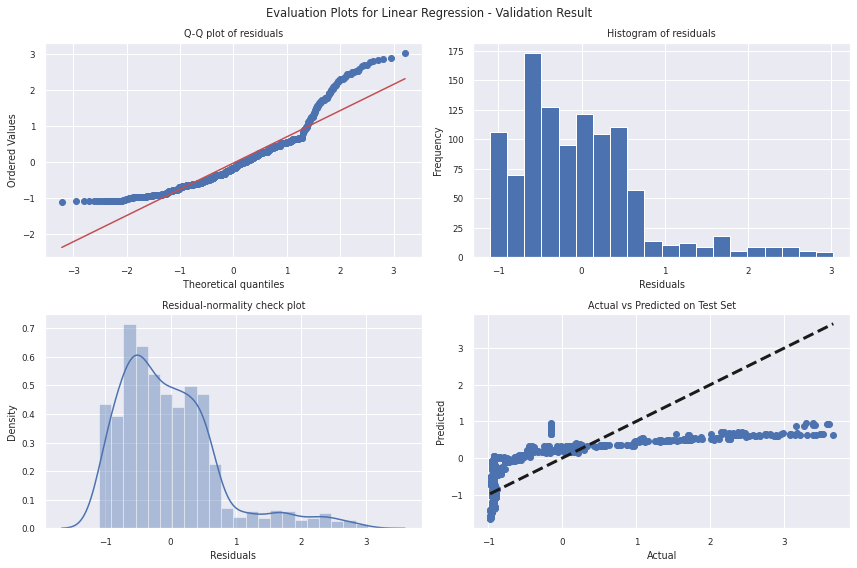

In [ ]:
visualizeOutputOfModel(y_val, y_pred_val, modelname='Linear Regression - Validation')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


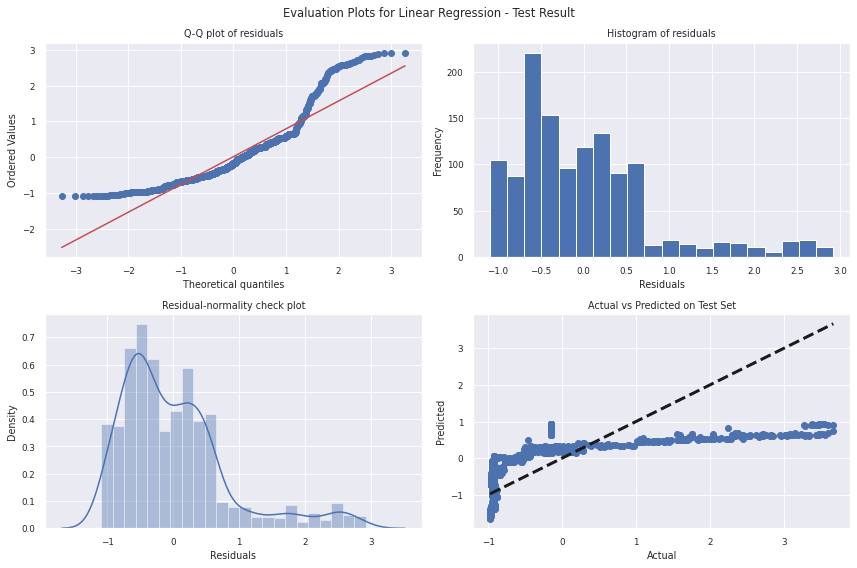

In [ ]:
visualizeOutputOfModel(y=y_test, pred=y_pred_test, modelname='Linear Regression - Test')

## K-NN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Train K-nearest neighbours model
knn = KNeighborsRegressor(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

# Evaluate model on validation set
y_val_pred = knn.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
adj_r2_val = 1 - ((1 - r2_val) * (len(y_val) - 1)) / (len(y_val) - X_val.shape[1] - 1)
smape_val = 100 / len(y_val) * np.sum(2 * np.abs(y_val_pred - y_val) / (np.abs(y_val) + np.abs(y_val_pred)))
mape_val = 100 / len(y_val) * np.sum(np.abs(y_val_pred - y_val) / np.abs(y_val))

# Print validation metrics
print(f'Validation RMSE: {rmse_val:.2f}')
print(f'Validation MAE: {mae_val:.2f}')
print(f'Validation R^2: {r2_val:.2f}')
print(f'Validation Adjusted R^2: {adj_r2_val:.2f}')
print(f'Validation SMAPE: {smape_val:.2f}%')
print(f'Validation MAPE: {mape_val:.2f}%')
print()

# Evaluate model on test set
y_test_pred = knn.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = 1 - ((1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
smape_test = 100 / len(y_test) * np.sum(2 * np.abs(y_test_pred - y_test) / (np.abs(y_test) + np.abs(y_test_pred)))
mape_test = 100 / len(y_test) * np.sum(np.abs(y_test_pred - y_test) / np.abs(y_test))

# Print test metrics
print(f'Test RMSE: {rmse_test:.2f}')
print(f'Test MAE: {mae_test:.2f}')
print(f'Validation R^2: {r2_val:.2f}')
print(f'Validation Adjusted R^2: {adj_r2_val:.2f}')
print(f'Validation SMAPE: {smape_val:.2f}%')
print(f'Validation MAPE: {mape_val:.2f}%')
print()


Validation RMSE: 0.60
Validation MAE: 0.28
Validation R^2: 0.65
Validation Adjusted R^2: 0.64
Validation SMAPE: 36.84%
Validation MAPE: 100.09%

Test RMSE: 0.63
Test MAE: 0.30
Validation R^2: 0.65
Validation Adjusted R^2: 0.64
Validation SMAPE: 36.84%
Validation MAPE: 100.09%



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


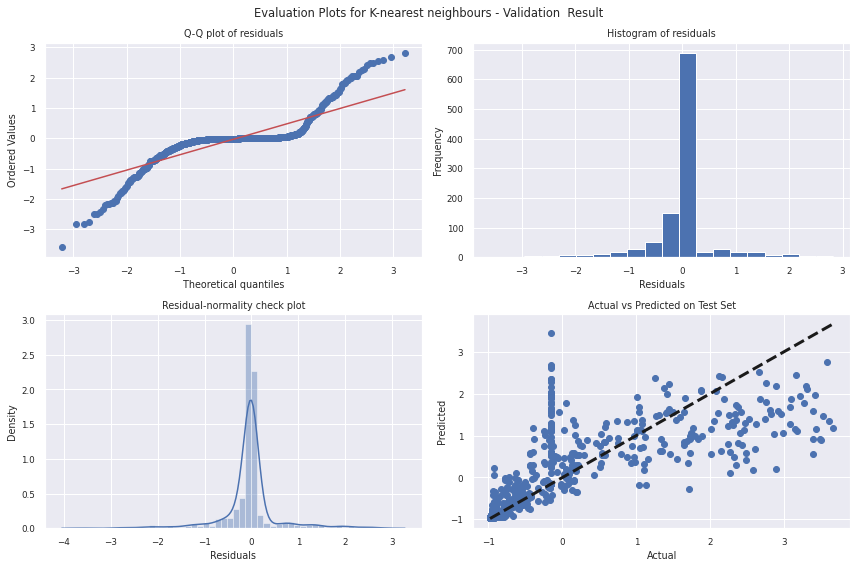

In [ ]:
visualizeOutputOfModel(y=y_val, pred=y_val_pred, modelname='K-nearest neighbours - Validation ')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


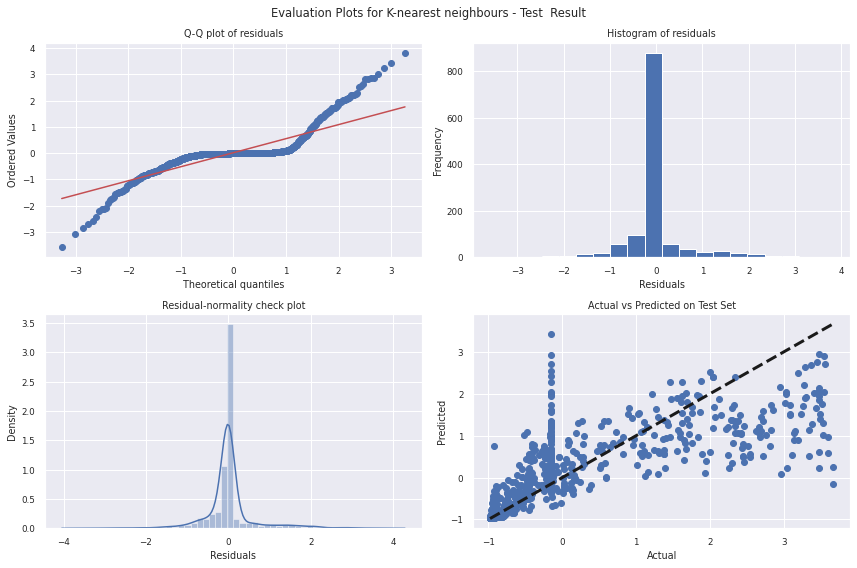

In [ ]:
visualizeOutputOfModel(y_test, y_test_pred, modelname='K-nearest neighbours - Test ')

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Train the model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

In [ ]:
rf.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = rf.predict(X_val)

val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
n = len(X_val)
p = X_val.shape[1]
val_adj_r2 = 1 - ((1 - val_r2) * (n - 1)) / (n - p - 1)

# Calculate SMAPE and MAPE
smape = 2 * np.mean(np.abs(y_val - y_val_pred) / (np.abs(y_val) + np.abs(y_val_pred)))
mape = np.mean(np.abs(y_val - y_val_pred) / np.abs(y_val))

# Print evaluation metrics
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Validation MAE: {val_mae:.4f}")
print(f"Validation R^2: {val_r2:.4f}")
print(f"Validation Adjusted R^2: {val_adj_r2:.4f}")
print(f"Validation SMAPE: {smape:.4f}")
print(f"Validation MAPE: {mape:.4f}")
print()

# Evaluate on test set
y_test_pred = rf.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
n = len(X_test)
p = X_test.shape[1]
test_adj_r2 = 1 - ((1 - test_r2) * (n - 1)) / (n - p - 1)

# Calculate SMAPE and MAPE
smape = 2 * np.mean(np.abs(y_test - y_test_pred) / (np.abs(y_test) + np.abs(y_test_pred)))
mape = np.mean(np.abs(y_test - y_test_pred) / np.abs(y_test))

# Print evaluation metrics
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Test Adjusted R^2: {test_adj_r2:.4f}")
print(f"Test SMAPE: {smape:.4f}")
print(f"Test MAPE: {mape:.4f}")


Validation RMSE: 0.1161
Validation MAE: 0.0154
Validation R^2: 0.9870
Validation Adjusted R^2: 0.9868
Validation SMAPE: 0.0338
Validation MAPE: 0.0584

Test RMSE: 0.1662
Test MAE: 0.0235
Test R^2: 0.9777
Test Adjusted R^2: 0.9774
Test SMAPE: 0.0427
Test MAPE: 0.0644


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


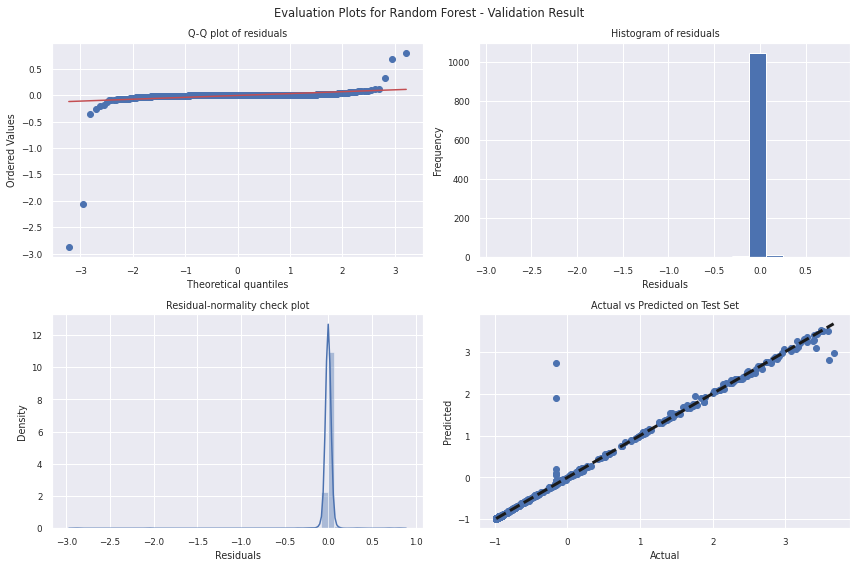

In [ ]:
visualizeOutputOfModel(y_val, y_val_pred, modelname='Random Forest - Validation')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


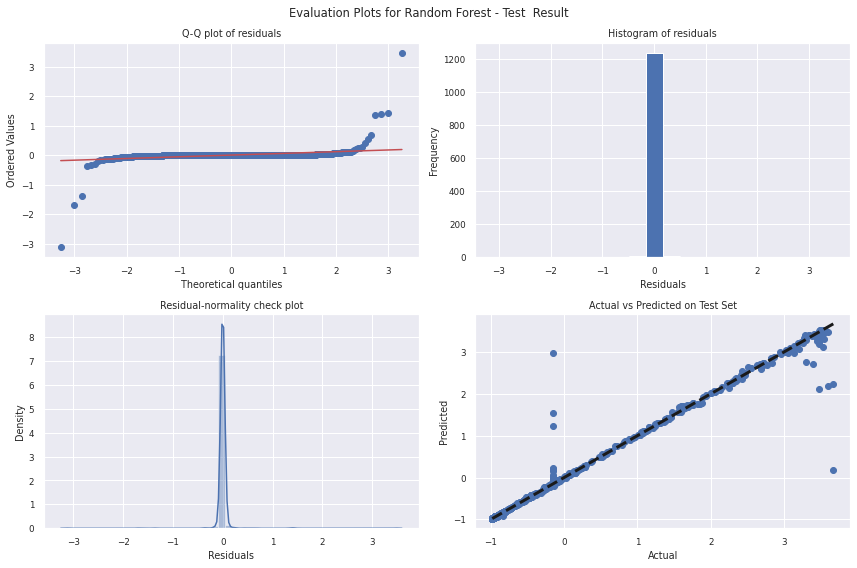

In [ ]:
visualizeOutputOfModel(y_test, y_test_pred, modelname='Random Forest - Test ')

## XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
# Define the XGBoost model and fit on the training set
model = xgb.XGBRegressor()

In [ ]:
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
n = len(y_val)
p = X_val.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
smape = np.mean(np.abs(y_pred - y_val) / ((np.abs(y_val) + np.abs(y_pred)) / 2)) * 100
mape = np.mean(np.abs(y_pred - y_val) / np.abs(y_val)) * 100

# Print the validation metrics
print(f'Validation RMSE: {rmse}')
print(f'Validation MAE: {mae}')
print(f'Validation R^2: {r2}')
print(f'Validation Adjusted R^2: {adj_r2}')
print(f'Validation SMAPE: {smape}')
print(f'Validation MAPE: {mape}')
print()

# Evaluate the model on the test set
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
smape = np.mean(np.abs(y_pred - y_test) / ((np.abs(y_test) + np.abs(y_pred)) / 2)) * 100
mape = np.mean(np.abs(y_pred - y_test) / np.abs(y_test)) * 100

# Print the test metrics
print(f'Test RMSE: {rmse}')
print(f'Test MAE: {mae}')
print(f'Test R^2: {r2}')
print(f'Test SMAPE: {smape}')
print(f'Test MAPE: {mape}')

[12:04:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation RMSE: 0.052144326747570455
Validation MAE: 0.025504456272919526
Validation R^2: 0.9973706702788696
Validation Adjusted R^2: 0.9973306043021667
Validation SMAPE: 8.412582337802403
Validation MAPE: 8.0109511467356

Test RMSE: 0.15992855686926055
Test MAE: 0.03605724203285387
Test R^2: 0.9793682080667496
Test SMAPE: 8.620482422371946
Test MAPE: 9.644572210031013


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


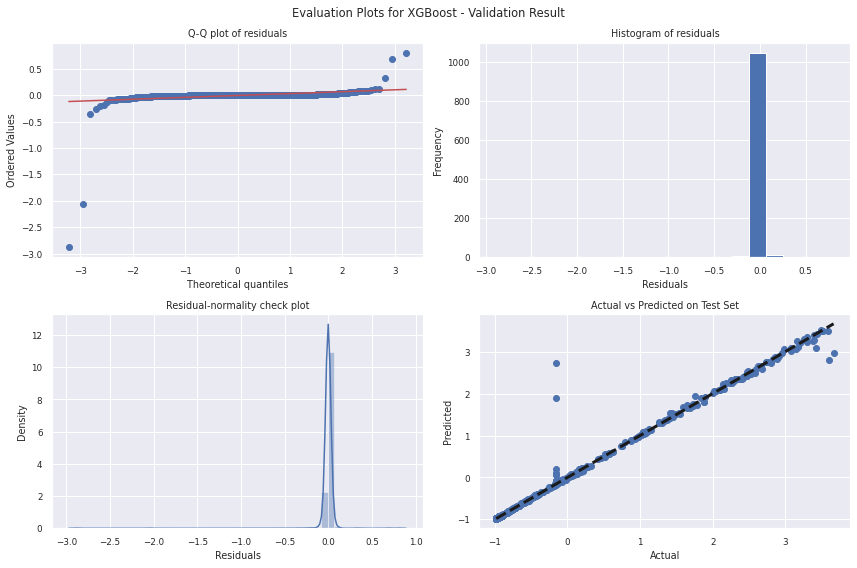

In [ ]:
visualizeOutputOfModel(y_val, y_val_pred, modelname='XGBoost - Validation')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


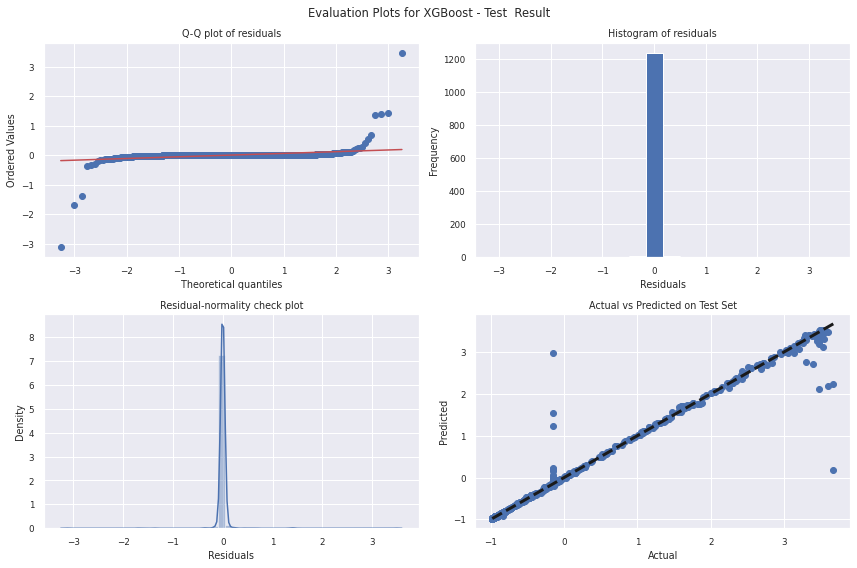

In [ ]:
visualizeOutputOfModel(y_test, y_test_pred, modelname='XGBoost - Test ')

## Auto Regression Model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tools.eval_measures import rmse, aic
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import zscore

# Define the number of lags to use in the AR model
lags = 10

# Split the data into training and testing sets
train_size = int(len(aapl_stocks_df) * 0.8)
train = aapl_stocks_df[:train_size]
test = aapl_stocks_df[train_size:]

# Fit the AR model on the training set
model = AutoReg(train['Close'].values, lags=lags)
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Evaluate the performance of the model using various metrics
mse = mean_squared_error(test['Close'], predictions)
mae = mean_absolute_error(test['Close'], predictions)
r2 = r2_score(test['Close'], predictions)
adj_r2 = 1 - ((1 - r2) * (len(test) - 1)) / (len(test) - lags - 1)
validation_rmse = rmse(test['Close'], predictions)
smape = 100/len(test) * np.sum(2 * np.abs(predictions - test['Close']) / (np.abs(test['Close']) + np.abs(predictions)))
mape = 100/len(test) * np.sum(np.abs(predictions - test['Close']) / np.abs(test['Close']))

# Print the evaluation metrics
print('Test Evaluation Values\nRMSE: {:.3f}'.format(validation_rmse))
print('MAE: {:.3f}'.format(mae))
print('R^2: {:.3f}'.format(r2))
print('Adjusted R^2: {:.3f}'.format(adj_r2))
print('SMAPE: {:.3f}'.format(smape))
print('MAPE: {:.3f}'.format(mape))

Test Evaluation Values
RMSE: 6.049
MAE: 4.289
R^2: -19.522
Adjusted R^2: -19.645
SMAPE: 100.547
MAPE: 2284.622


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


#### To Visualize the model output

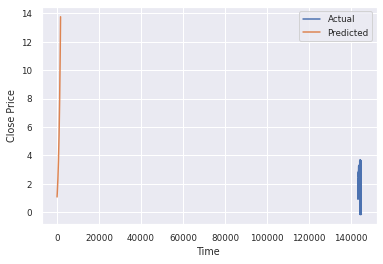

In [ ]:
# Plot the actual and predicted values of the time series
plt.plot(test['Close'], label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## Moving Average Model

In [ ]:
# Define the window size
window_size = 5

# Calculate the rolling mean
aapl_stocks_df['rolling_mean'] = aapl_stocks_df['Close'].rolling(window=window_size).mean()

# Drop the first few rows that have NaN values due to the rolling mean calculation
aapl_stocks_df.dropna(inplace=True)

# Split the dataset into training and testing sets
X = aapl_stocks_df.drop(['Close', 'rolling_mean'], axis=1)
y = aapl_stocks_df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
y_pred_train = [np.mean(y_train)] * len(y_train)

# Evaluate the model on the training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
n = len(X_train)
adj_r2_train = 1 - ((1 - r2_train) * (n - 1) / (n - len(X_train.columns) - 1))
smape_train = 100/len(y_train) * np.sum(2 * np.abs(y_pred_train - y_train) / (np.abs(y_train) + np.abs(y_pred_train)))
mape_train = 100/len(y_train) * np.sum(np.abs(y_pred_train - y_train) / np.abs(y_train))

# Fit the model on the testing data
y_pred_test = [np.mean(y_train)] * len(y_test)

# Evaluate the model on the testing data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
n = len(X_test)
adj_r2_test = 1 - ((1 - r2_test) * (n - 1) / (n - len(X_test.columns) - 1))
smape_test = 100/len(y_test) * np.sum(2 * np.abs(y_pred_test - y_test) / (np.abs(y_test) + np.abs(y_pred_test)))
mape_test = 100/len(y_test) * np.sum(np.abs(y_pred_test - y_test) / np.abs(y_test))

# Print the evaluation metrics
print(f'Training RMSE: {rmse_train:.2f}')
print(f'Testing RMSE: {rmse_test:.2f}')
print(f'Training MAE: {mae_train:.2f}')
print(f'Testing MAE: {mae_test:.2f}')
print(f'Training R^2: {r2_train:.2f}')
print(f'Testing R^2: {r2_test:.2f}')
print(f'Training Adjusted R^2: {adj_r2_train:.2f}')
print(f'Testing Adjusted R^2: {adj_r2_test:.2f}')
print(f'Training SMAPE: {smape_train:.2f}')
print(f'Testing SMAPE: {smape_test:.2f}')
print(f'Training MAPE: {mape_train:.2f}')
print(f'Testing MAPE: {mape_test:.2f}')

Training RMSE: 1.08
Testing RMSE: 1.10
Training MAE: 0.77
Testing MAE: 0.78
Training R^2: 0.00
Testing R^2: -0.00
Training Adjusted R^2: -0.00
Testing Adjusted R^2: -0.01
Training SMAPE: 107.81
Testing SMAPE: 107.44
Training MAPE: 140.50
Testing MAPE: 110.03


##### Visualizing results of MA model

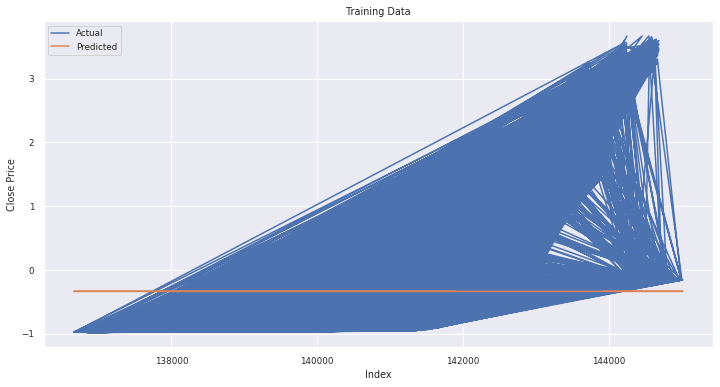

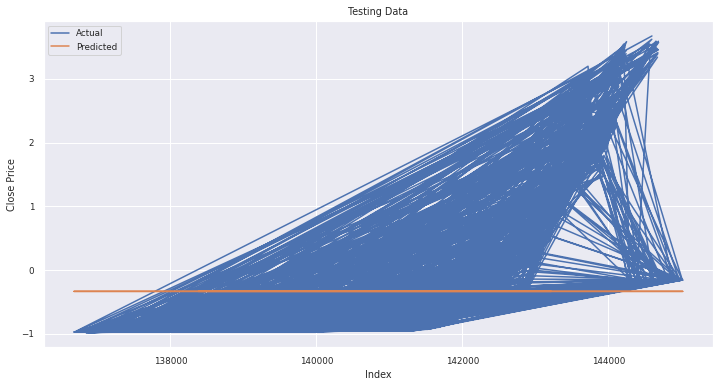

In [ ]:
# Plot the actual values and the predicted values for the training data
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train.values, label='Actual')
plt.plot(y_train.index, y_pred_train, label='Predicted')
plt.title('Training Data')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plot the actual values and the predicted values for the testing data
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred_test, label='Predicted')
plt.title('Testing Data')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()